# Exploratory Data Analysis

Transboundary Freshwater Diplomacy Database 1948-2008

As I prepare for the 2025 data update, I want to better understand the 2008 data. What are its key findings, what are some gaps or questions that come up?

A project I have in mind is to better understand the impact of the changes to the search terms method on the 2025 data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import openpyxl

### Load events data & read it

In [ ]:
# read excel (downloaded from Shared Waters Lab's shared Box drive)
df = pd.read_excel('Data/Events_2008.xls')

First, checking what the database contains. Looking at:
* Number of rows and columns
* Column names
* Type of data in some columns

Some things I'm interested in exploring first:
* Which basins are missing events? (our database performs a search in 313 basins)
* Which basins appear the most? What are the countries that appear the most within those basins?
* Maybe: normalize? what is the relationship between number of countries?

### Load spatial data & read it

In [ ]:
# check out the basin data
spatial_df_path = 'Data/BasinMaster313_20240807.csv'
spatial_df = pd.read_csv(spatial_df_path)

(313, 29)

### missing basins

In [153]:
spatial_bcode_list = spatial_df['BCODE'].unique()

# find basins that are msising from the events list
missing_events_bcode_list = set(spatial_bcode_list) - set(events_bcode_list)
missing_events_bcode_list = sorted(list(missing_events_bcode_list))

print(len(missing_events_bcode_list))
print(missing_events_bcode_list)

172
['ADIG', 'ALHN', 'ALKL', 'ALSK', 'AMCR', 'ANAK', 'ANGE', 'ANNL', 'ATBN', 'AVLS', 'AYSN', 'BAKR', 'BATU', 'BDSO', 'BENT', 'BIAX', 'BLUN', 'BLZE', 'BNSA', 'BRBY', 'BRKA', 'BRMA', 'CAET', 'CDLR', 'CGNL', 'CHIC', 'CHLT', 'CHUY', 'CLKT', 'CNCT', 'COCO', 'COMA', 'COPR', 'CRUH', 'CSTL', 'CSTO', 'CTAT', 'CTNA', 'CULL', 'CVLY', 'DAUR', 'DIGL', 'DRAG', 'DRAX', 'DSHT', 'EMSX', 'ERNE', 'ESQB', 'FANE', 'FLRY', 'FOYL', 'FRSR', 'FRTH', 'GALG', 'GASH', 'GEBA', 'GLAM', 'GLNA', 'GRON', 'GRYE', 'GSCR', 'GUIR', 'HIMR', 'HOND', 'HSIX', 'INDL', 'ISNZ', 'JAPR', 'JCBS', 'JURD', 'KEMI', 'KMOE', 'KOWL', 'KRKA', 'KRLV', 'LAVA', 'LGFL', 'LGPS', 'LKAZ', 'LKCW', 'LKCY', 'LKDR', 'LKEQ', 'LKFN', 'LKNT', 'LKPP', 'LKRW', 'LKSG', 'LKTK', 'LKUN', 'LMEL', 'LOAX', 'LOES', 'LOFF', 'LSCR', 'LUCI', 'MANA', 'MARO', 'MASS', 'MBEX', 'MHRI', 'MIRA', 'MOAX', 'MOHO', 'MONO', 'MOTQ', 'MRNI', 'MTJE', 'NAAF', 'NAAT', 'NDLV', 'NEGR', 'NYGA', 'NYNK', 'ODBN', 'OGOO', 'OLNG', 'OUEM', 'OULU', 'PANG', 'PAZX', 'PCHA', 'PDNL', 'PLDV', 'PL

In [158]:
old_searchterms = pd.read_excel('pre-2024_search_terms.xlsx')
missing_basins_searchterms = old_searchterms[old_searchterms['BCODE'].isin(missing_events_bcode_list)]

In [160]:
columns = ['BCODE','Basin_Name', 'Basin_Specific_Terms']
missing_basins_searchterms = pd.DataFrame(missing_basins_searchterms, columns=columns)

In [ ]:
missing_basins_searchterms["Basin_Name"].unique()
# ok maybe that's not the way to go, I'm guessing a bunch of these just weren't in their search. 

array(['Adige', 'Alakol', 'Alsek', 'Amacuro', 'An Nahr Al Kabir',
       'Angerman', 'Annole', 'Artibonite', 'Aviles', 'Aysen', 'Baker',
       'Bahr at Tubat', 'Bidasoa', 'Benito/Ntem', 'Bia', 'Beilun',
       'Belize', 'Oued Bou Namoussa', 'Berbyelva', 'Baraka', 'Barima',
       'Caetani', 'Candelaria', 'Changuinola', 'Carmen Silva/Chico',
       'Choluteca', 'Chuy', 'Chilkat', 'Connecticut', 'Coco/Segovia',
       'Comau', 'Copper', 'Coruh', 'Castletown', 'Cestos',
       'Coatan Achute', 'Cetina', 'Cullen', 'Cavally', 'Daoura', 'Digul',
       'Dragonja', 'Dra', 'Dasht', 'Erne', 'Essequibo', 'Fane', 'Flurry',
       'Foyle', 'Fraser', 'Firth', 'Gallegos/Chico', 'Gash',
       'Geba-Corubal', 'Glama', 'Galana', 'Garonne', 'Gruzskiy Yelanchik',
       'Great Scarcies', 'Guir', 'Hamun-i-Mashkel/Rakshan', 'Hondo',
       'Bei Jiang/Hsi', 'Indalsalven', 'Isonzo', 'Jayapura', 'Jacobs',
       'Jurado', 'Kemi', 'Komoe', 'Kowl E Namaksar', 'Krka', 'Klaralven',
       'Lava/Pregel', 'Laguna

In [ ]:
# maybe we pick basins with only one event



In [ ]:
# make basin_specific_terms called "Old_Terms" and a new columns "new_terms"

### Which basins have the most events?
and some visualizations

could:
* normalize based on number of riparian countries?
* linear regression? number of events vs number of riparian countries 

In [ ]:
danube_events = df[df['BCode']=='DANU']

# get all unique entries from both 'CCODE_1' and 'CCODE_2' columns in df
# danube_countries = danube_events[''] 

# and do something similar, but this time find the 'Riparian_C' value for this bcode
# and then it'll be a long string with country names separated by commas 
# ugh except some of them might have commas in their names?? ~ "Ireland, Republic of" type of deal 

riparian_value = spatial_df[spatial_df['BCODE'] == 'DANU']['Riparian_C'].iloc[0]
#print(riparian_value)
countries = riparian_value.split(',')
print(countries)
print(len(countries))


In [165]:
# print the bcode of basins that appear most frequently

# Calculate value frequencies for the 'bcode' column
bcode_counts = df['BCode'].value_counts()

basin_frequency_df = bcode_counts.to_frame('frequency').reset_index()

# Rename the columns for clarity
basin_frequency_df.columns = ['BCode', 'frequency']

print("New DataFrame with BCode and Frequency:")
print(basin_frequency_df)
# and/or create a sorted list of those 170 something basins by most frequent to least

New DataFrame with BCode and Frequency:
    BCode  frequency
0    DANU        975
1    MEKO        790
2    JORD        583
3    TIGR        549
4    UNKN        531
..    ...        ...
141  MIUS          1
142  OYPK          1
143  SCRO          1
144  BANN          1
145  PUNG          1

[146 rows x 2 columns]


In [168]:
single_events_df = basin_frequency_df[basin_frequency_df['frequency']==1]
len(single_events_df)
single_event_basins = single_events_df['BCode'].unique()

In [170]:
single_basins_searchterms = old_searchterms[old_searchterms['BCODE'].isin(single_event_basins)]
columns = ['BCODE','Basin_Name', 'Basin_Specific_Terms']
single_basins_searchterms = pd.DataFrame(single_basins_searchterms, columns=columns)
#single_basins_searchterms

## Workflow visualization

do this somewhere else actually

## Histograms/visualizations

* histogram! so the highest is 975 and the lowest is 1 
* what is the distribution of this?
* x-axis should be number of events
* y-axis should be count of basins in that bin



a lot of these visualizations were written by cursor.
in general, it looks like the majority of basins are going to have fewer than 20 events
so maybe a histogram isn't it...

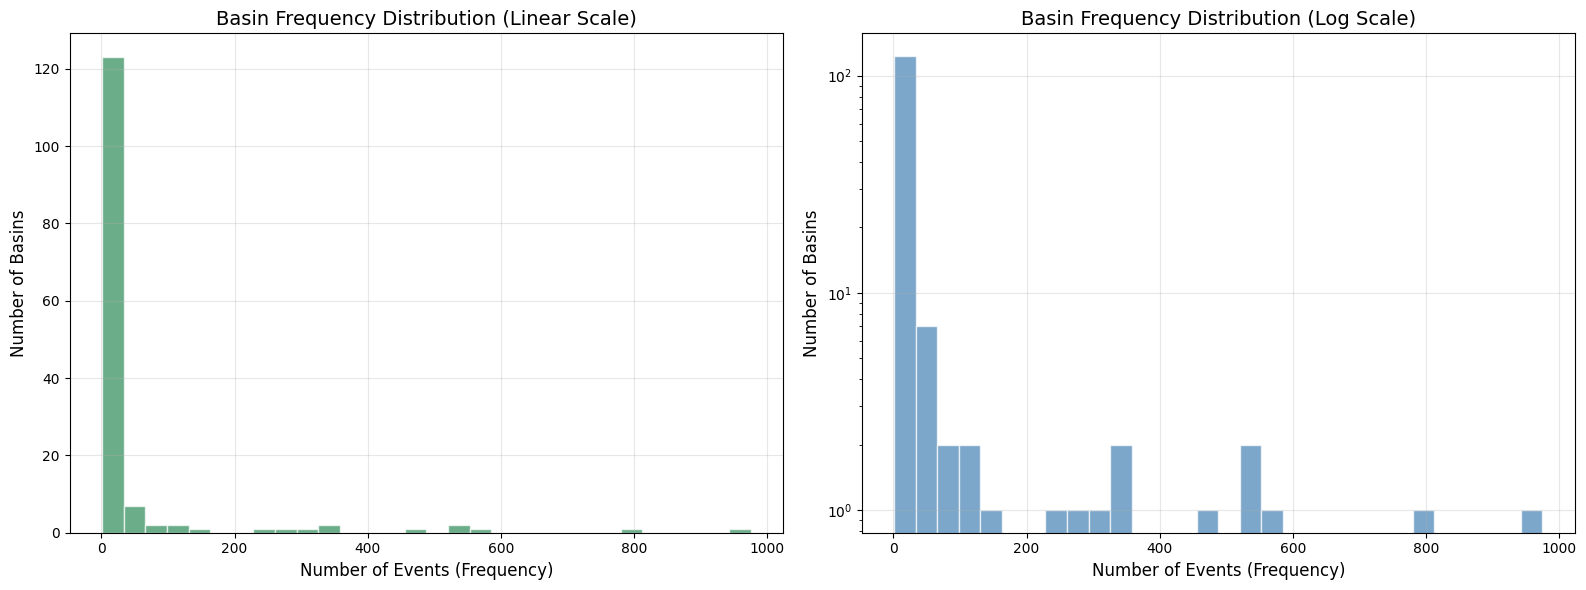


Distribution by frequency ranges:
1-10 events: 91 basins
11-50 events: 37 basins
51-100 events: 5 basins
101-500 events: 8 basins
500+ events: 5 basins


In [6]:
# Alternative histogram with log scale for better visualization of the distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Regular histogram
ax1.hist(basin_frequency_df['frequency'], bins=30, edgecolor='white', color='seagreen', alpha=0.7)
ax1.set_xlabel('Number of Events (Frequency)', fontsize=12)
ax1.set_ylabel('Number of Basins', fontsize=12)
ax1.set_title('Basin Frequency Distribution (Linear Scale)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Log scale histogram for better visualization of the tail
ax2.hist(basin_frequency_df['frequency'], bins=30, edgecolor='white', color='steelblue', alpha=0.7)
ax2.set_xlabel('Number of Events (Frequency)', fontsize=12)
ax2.set_ylabel('Number of Basins', fontsize=12)
ax2.set_title('Basin Frequency Distribution (Log Scale)', fontsize=14)
ax2.set_yscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show the distribution of frequencies in different ranges
print("\nDistribution by frequency ranges:")
print("=" * 40)
print(f"1-10 events: {len(basin_frequency_df[basin_frequency_df['frequency'] <= 10])} basins")
print(f"11-50 events: {len(basin_frequency_df[(basin_frequency_df['frequency'] > 10) & (basin_frequency_df['frequency'] <= 50)])} basins")
print(f"51-100 events: {len(basin_frequency_df[(basin_frequency_df['frequency'] > 50) & (basin_frequency_df['frequency'] <= 100)])} basins")
print(f"101-500 events: {len(basin_frequency_df[(basin_frequency_df['frequency'] > 100) & (basin_frequency_df['frequency'] <= 500)])} basins")
print(f"500+ events: {len(basin_frequency_df[basin_frequency_df['frequency'] > 500])} basins")


In [7]:
# Split the data into two groups for better visualization
high_freq_basins = basin_frequency_df[basin_frequency_df['frequency'] >= 100]
low_freq_basins = basin_frequency_df[basin_frequency_df['frequency'] < 100]

print(f"High frequency basins (≥100 events): {len(high_freq_basins)} basins")
print(f"Low frequency basins (<100 events): {len(low_freq_basins)} basins")
print(f"Frequency range for high freq: {high_freq_basins['frequency'].min()} to {high_freq_basins['frequency'].max()}")
print(f"Frequency range for low freq: {low_freq_basins['frequency'].min()} to {low_freq_basins['frequency'].max()}")


High frequency basins (≥100 events): 14 basins
Low frequency basins (<100 events): 132 basins
Frequency range for high freq: 100 to 975
Frequency range for low freq: 1 to 98


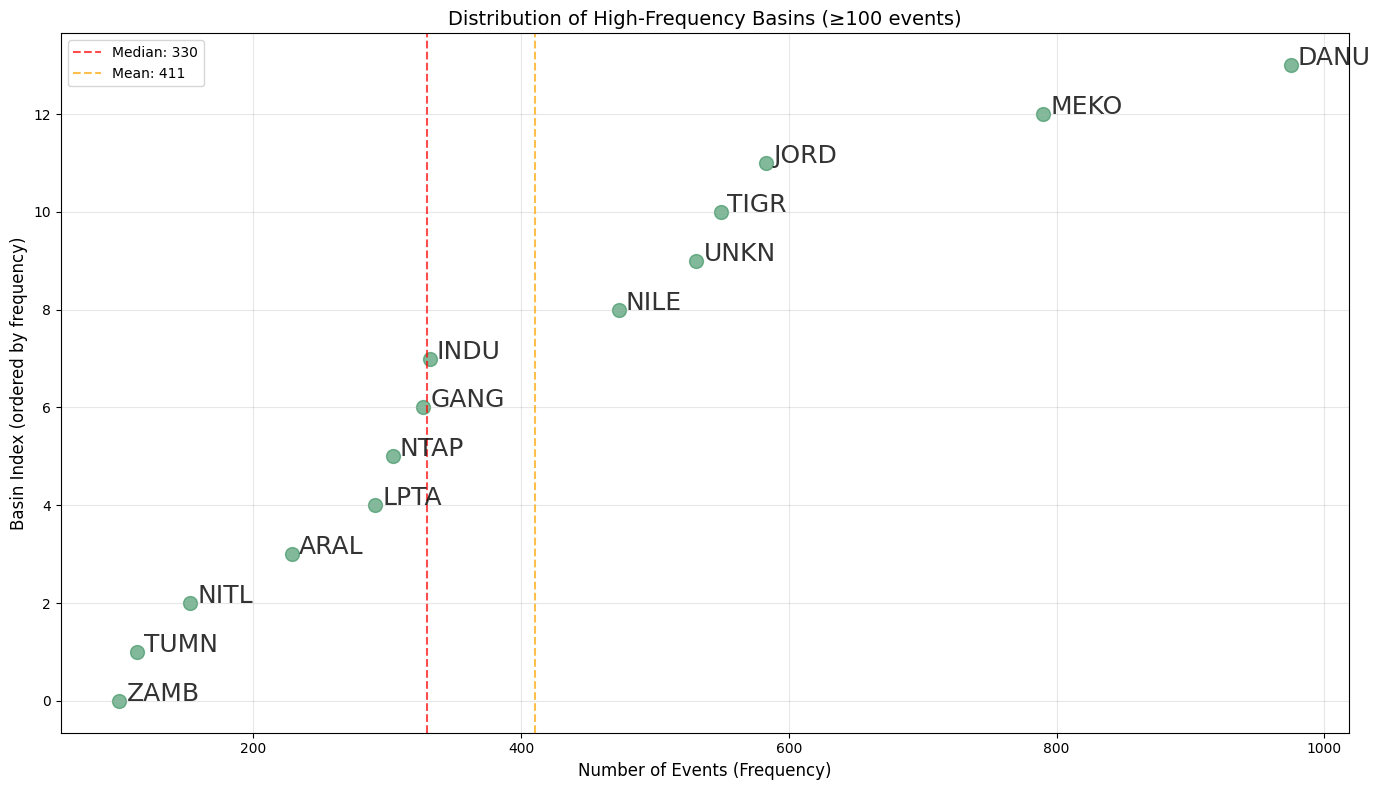

High-frequency basins: 14 total
Top 5 most frequent: [['DANU', 975], ['MEKO', 790], ['JORD', 583], ['TIGR', 549], ['UNKN', 531]]


In [8]:
# Scatter plot for high-frequency basins (≥100 events) with BCode labels
fig, ax = plt.subplots(figsize=(14, 8))

# Sort by frequency for better visualization
high_freq_sorted = high_freq_basins.sort_values('frequency')

# Create scatter plot with frequency on x-axis and basin index on y-axis
y_positions = range(len(high_freq_sorted))
ax.scatter(high_freq_sorted['frequency'], y_positions, alpha=0.6, s=100, color='seagreen')

# Add BCode labels to each point
for i, (idx, row) in enumerate(high_freq_sorted.iterrows()):
    ax.annotate(row['BCode'], 
                (row['frequency'], i), 
                xytext=(5, 0), 
                textcoords='offset points',
                fontsize=18,
                alpha=0.8)

ax.set_xlabel('Number of Events (Frequency)', fontsize=12)
ax.set_ylabel('Basin Index (ordered by frequency)', fontsize=12)
ax.set_title('Distribution of High-Frequency Basins (≥100 events)', fontsize=14)
ax.grid(True, alpha=0.3)

# Add some reference lines
ax.axvline(x=high_freq_basins['frequency'].median(), color='red', linestyle='--', alpha=0.7, label=f'Median: {high_freq_basins["frequency"].median():.0f}')
ax.axvline(x=high_freq_basins['frequency'].mean(), color='orange', linestyle='--', alpha=0.7, label=f'Mean: {high_freq_basins["frequency"].mean():.0f}')
ax.legend()

plt.tight_layout()
plt.show()

print(f"High-frequency basins: {len(high_freq_basins)} total")
print(f"Top 5 most frequent: {high_freq_basins.nlargest(5, 'frequency')[['BCode', 'frequency']].values.tolist()}")


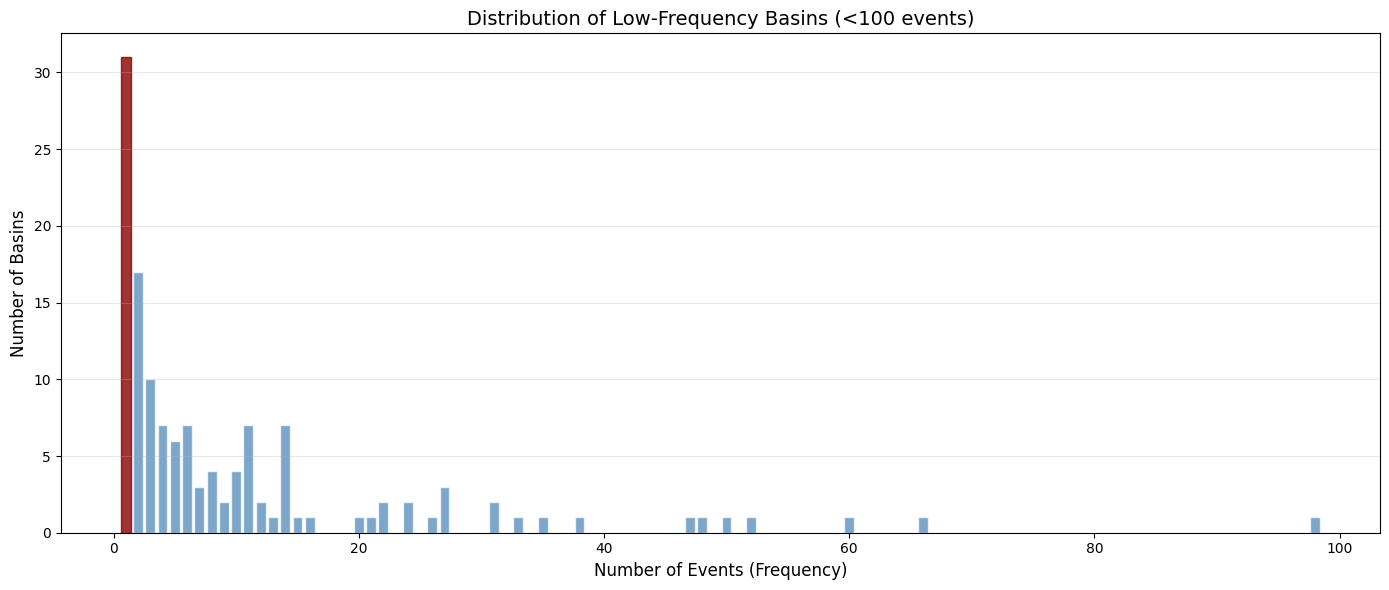

Low-frequency basins: 132 total
Basins with exactly 1 event: 31 (23.5%)
Basins with 2-5 events: 40
Basins with 6-20 events: 40


In [31]:
# Better visualization for low-frequency basins (<100 events)
# Since many are at frequency 1, let's create a bar chart showing counts by frequency

# Count how many basins have each frequency
freq_counts = low_freq_basins['frequency'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(14, 6))

# Create bar chart
bars = ax.bar(freq_counts.index, freq_counts.values, color='steelblue', alpha=0.7, edgecolor='white')

ax.set_xlabel('Number of Events (Frequency)', fontsize=12)
ax.set_ylabel('Number of Basins', fontsize=12)
ax.set_title('Distribution of Low-Frequency Basins (<100 events)', fontsize=14)
ax.grid(True, alpha=0.3, axis='y')

# Highlight the frequency=1 bar
bars[0].set_color('darkred')
bars[0].set_alpha(0.8)

plt.tight_layout()
plt.show()

print(f"Low-frequency basins: {len(low_freq_basins)} total")
print(f"Basins with exactly 1 event: {freq_counts[1]} ({freq_counts[1]/len(low_freq_basins)*100:.1f}%)")
print(f"Basins with 2-5 events: {freq_counts[(freq_counts.index >= 2) & (freq_counts.index <= 5)].sum()}")
print(f"Basins with 6-20 events: {freq_counts[(freq_counts.index >= 6) & (freq_counts.index <= 20)].sum()}")


In [ ]:
# maybe drop everything from this list that has a frequency of just 1
single_event_basins = basin_frequency_df[basin_frequency_df['frequency']==1]
len(single_event_basins)

## Events v number of countries

In [12]:
basin_frequency_df = basin_frequency_df[basin_frequency_df['BCode'] != 'UNKN']
basin_frequency_df.head()

,BCode,frequency
0,DANU,975
1,MEKO,790
2,JORD,583
3,TIGR,549
5,NILE,473


In [19]:
print("Checking for missing basins...")
missing_basins = []
for basin in basin_frequency_df['BCode']:
    matching_rows = spatial_df[spatial_df['BCODE'] == basin]
    if len(matching_rows) == 0:
        missing_basins.append(basin)

print(f"Number of basins missing from spatial data: {len(missing_basins)}")
if missing_basins:
    print(f"Missing basins: {missing_basins[:10]}...")  # show first 10

# Let's also check the reverse - what's in spatial_df but not in basin_frequency_df
spatial_basins = set(spatial_df['BCODE'].unique())
event_basins = set(basin_frequency_df['BCode'].unique())
print(f"\nBasins in spatial data: {len(spatial_basins)}")
print(f"Basins in event data: {len(event_basins)}")
print(f"Basins in spatial but not events: {len(spatial_basins - event_basins)}")
print(f"Basins in events but not spatial: {len(event_basins - spatial_basins)}")

Checking for missing basins...
Number of basins missing from spatial data: 4
Missing basins: ['NTAP', 'NITL', 'SVCD', 'GNRL']...

Basins in spatial data: 313
Basins in event data: 145
Basins in spatial but not events: 172
Basins in events but not spatial: 4


In [20]:
# how many events are in those four
missing_basins_frequencies = basin_frequency_df[basin_frequency_df['BCode'].isin(missing_basins)]
missing_basins_frequencies

,BCode,frequency
8,NTAP,304
11,NITL,153
112,SVCD,2
133,GNRL,1


In [23]:
# gonna redefine this be removing the 4 that aren't in the spatial dataset
df_missing = df[df['BCode']=='GNRL']
print(df_missing)

        ID  UNIQUE_ID  Interaction_ID     ID1  EVENT_MASTER GROUPED_ID BAR_ID  \
4933  4981       2790               1  5153.0        5126.0       F321   F321   

     SOURCE_ID       DATE DYAD_CODE  ... Issue_Type2  Macro_Event  \
4933       321 1997-10-09         _  ...         0.0          NaN   

                                               Comments      SOURCE  \
4933  EMPHASIZE cooperation in mng.ment;  CIS includ...  WNC (FBIS)   

                       Source_Source KLL_Categ FBIS_Region   DOC_DATE  \
4933  Moscow ITAR-TASS World Service         1         sov  10/9/1997   

                 EVENT_ISSUE KLL_ISSUE_NUMBER  
4933  water use & protection                8  

[1 rows x 36 columns]


In [24]:
# make a new df that compares event frequency and number of riparian countries
# will the many '1's throw it off? maybe!

# create empty df
#new_df_columns = ['BCODE', 'Event_Count' 'Riparian_Names', 'Riparian_Count']
#df_riparian_events = pd.DataFrame(columns=new_df_columns)
df_riparian_events = {} # starting with dictionary might be better?

# iterate through all bcodes
for basin in basin_frequency_df['BCode']:
    # add the bcode to 
    riparian_value = spatial_df[spatial_df['BCODE'] == basin]['Riparian_C']
    #add riparian_value to the df
    countries = riparian_value.split(',')
    count_riparian_countries = len(countries)



AttributeError: 'Series' object has no attribute 'split'

In [ ]:
# maybe a new df that's basin, count of frequency, count of unique ccodes
# and I want to make sure this third piece would combine the columns (ccode 1, ccode 2)
# for this it might also make sense to normalize it by number of riparian countries?
# and I don't know that this db has that information, but the spatial db does...


# import spatial database
# and with that I can answer that last question, and determine which bcodes are missing from the 2008 list 
# do they just not have events? are they small and do we expect that to exclude them from the database? 

# maybe make a filter/slice of them like df_nile 
# and do a similar display of the countries that appear most often
#

Additionally, there are a few columns that I can explore here, but might more sense to look at the metadata/documentation
* What is the difference between the COPDAB and BAR scale and how they're used here? (note: I know BAR is specifically for basins whereas COPDAB is what the TFDD team used to make the BAR "basins at risk" scale)
* In general interested in what info is in these columns: ['EVENT_TYPE', 'EVENT_SUMMARY',
       'Issue_Type1', 'Issue_Type2', 'Macro_Event']

In [49]:
basin_frequency_df

,BCode,frequency
0,DANU,975
1,MEKO,790
2,JORD,583
3,TIGR,549
5,NILE,473
...,...,...
141,MIUS,1
142,OYPK,1
143,SCRO,1
144,BANN,1


In [25]:
# Now let's fix the original dictionary building code to handle missing basins
df_riparian_events = {} # starting fresh

# iterate through all bcodes
for basin in basin_frequency_df['BCode']:
    # get the event frequency for this basin
    event_frequency = basin_frequency_df[basin_frequency_df['BCode'] == basin]['frequency'].iloc[0]
    
    # get the riparian countries for this basin - with error checking
    matching_rows = spatial_df[spatial_df['BCODE'] == basin]
    
    if len(matching_rows) > 0:
        # Basin found in spatial data
        riparian_value = matching_rows['Riparian_C'].iloc[0]
        countries = riparian_value.split(',')
        # clean up whitespace
        countries = [country.strip() for country in countries]
        count_riparian_countries = len(countries)
    else:
        # Basin not found in spatial data
        print(f"Warning: Basin {basin} not found in spatial data")
        countries = []
        count_riparian_countries = 0
    
    # store in dictionary
    df_riparian_events[basin] = {
        'BCODE': basin,
        'event_frequency': event_frequency,
        'riparian_countries': countries,
        'riparian_count': count_riparian_countries
    }

print(f"Successfully processed {len(df_riparian_events)} basins")


Successfully processed 145 basins


In [26]:
df_riparian_events

{'DANU': {'BCODE': 'DANU',
  'event_frequency': np.int64(975),
  'riparian_countries': ['Albania',
   'Austria',
   'Bosnia and Herzegovina',
   'Bulgaria',
   'Croatia',
   'Czech Republic',
   'Germany',
   'Hungary',
   'Italy',
   'Moldova',
   'Republic of',
   'Montenegro',
   'Poland',
   'Republic of North Macedonia',
   'Romania',
   'Serbia',
   'Slovakia',
   'Slovenia',
   'Switzerland',
   'Ukraine'],
  'riparian_count': 20},
 'MEKO': {'BCODE': 'MEKO',
  'event_frequency': np.int64(790),
  'riparian_countries': ['Cambodia',
   'China',
   "Lao People's Democratic Republic",
   'Myanmar',
   'Thailand',
   'Viet Nam'],
  'riparian_count': 6},
 'JORD': {'BCODE': 'JORD',
  'event_frequency': np.int64(583),
  'riparian_countries': ['Egypt',
   'Israel',
   'Jordan',
   'Lebanon',
   'Syrian Arab Republic',
   'West Bank'],
  'riparian_count': 6},
 'TIGR': {'BCODE': 'TIGR',
  'event_frequency': np.int64(549),
  'riparian_countries': ['Iran  (Islamic Republic of)',
   'Iraq',
  

In [27]:
riparian_events = pd.DataFrame(df_riparian_events)
riparian_events = riparian_events.T
riparian_events.reset_index(drop=True)
riparian_events


,BCODE,event_frequency,riparian_countries,riparian_count
DANU,DANU,975,"[Albania, Austria, Bosnia and Herzegovina, Bul...",20
MEKO,MEKO,790,"[Cambodia, China, Lao People's Democratic Repu...",6
JORD,JORD,583,"[Egypt, Israel, Jordan, Lebanon, Syrian Arab R...",6
TIGR,TIGR,549,"[Iran (Islamic Republic of), Iraq, Jordan, Sa...",6
NILE,NILE,473,"[Abyei, Burundi, Democratic Republic of the Co...",14
...,...,...,...,...
MIUS,MIUS,1,"[Ukraine, Russian Federation]",2
OYPK,OYPK,1,"[Brazil, French Guiana]",2
SCRO,SCRO,1,"[Canada, United States of America]",2
BANN,BANN,1,"[Ireland, U.K. of Great Britain and Northern I...",2


In [42]:
# # Simple scatter plot
# plt.figure(figsize=(10, 6))
# plt.scatter(riparian_events['riparian_count'], riparian_events['event_frequency'], alpha=0.6)
# plt.xlabel('Number of Riparian Countries')
# plt.ylabel('Number of Events')
# plt.title('Riparian Countries vs Event Frequency')
# plt.show()

In [ ]:
# same but add labels for outliers
# add regression line maybe
# also make the number of country x-axis ticks be whole numbers?

In [ ]:
# Simple scatter plot with integer x-axis ticks
plt.figure(figsize=(12, 8))
plt.scatter(riparian_events['riparian_count'], riparian_events['event_frequency'], 
           alpha=0.6, s=60, color='steelblue', edgecolors='white', linewidth=0.5)

# Set x-axis to show only integer ticks
max_riparian = int(riparian_events['riparian_count'].max())
plt.xticks(range(0, max_riparian + 1, 2))  # Every 2 integers: 0, 2, 4, 6, 8, etc.

plt.xlabel('Number of Riparian Countries', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Riparian Countries vs Event Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


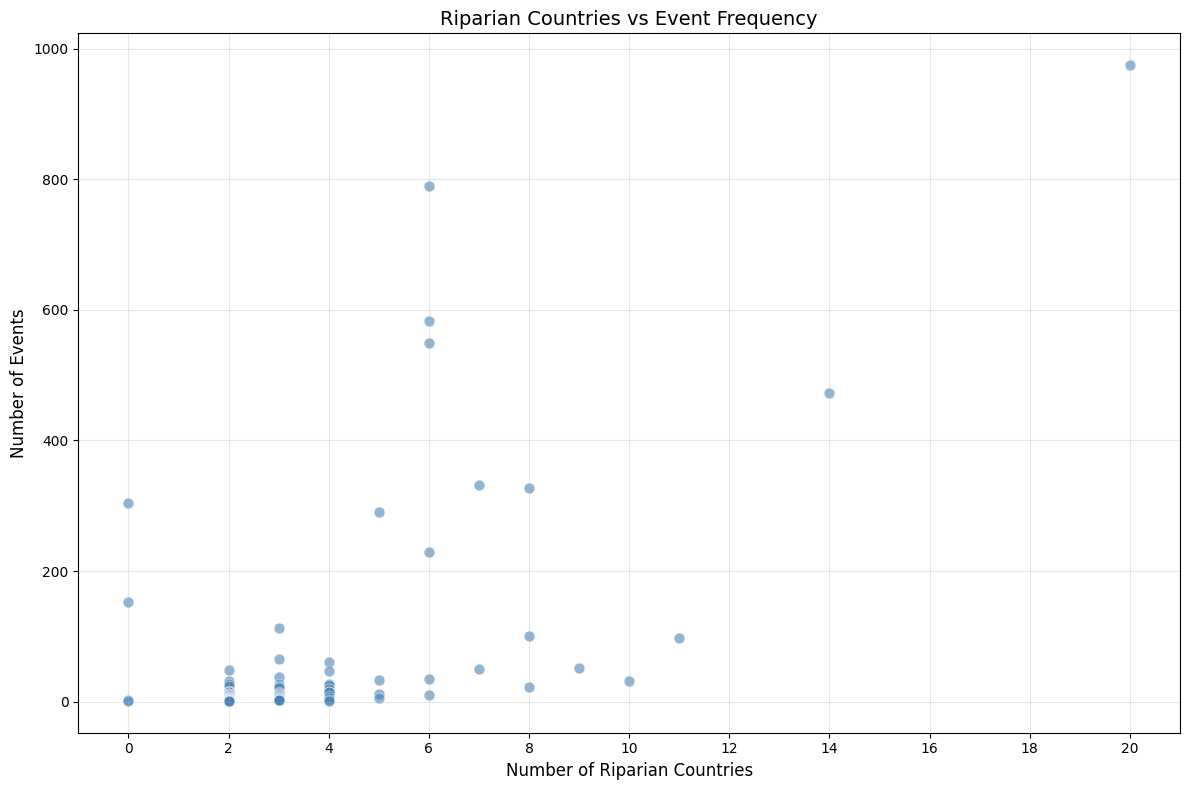

In [91]:
# Simple scatter plot with integer x-axis ticks
plt.figure(figsize=(12, 8))
plt.scatter(riparian_events['riparian_count'], riparian_events['event_frequency'], 
           alpha=0.6, s=60, color='steelblue', edgecolors='white', linewidth=0.5)

# Set x-axis to show only integer ticks
max_riparian = int(riparian_events['riparian_count'].max())
plt.xticks(range(0, max_riparian + 1, 2))  # Every 2 integers: 0, 2, 4, 6, 8, etc.

plt.xlabel('Number of Riparian Countries', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.title('Riparian Countries vs Event Frequency', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [33]:
# Outlier detection with corrected variable names
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Find outliers in both dimensions
riparian_outliers = find_outliers_iqr(riparian_events, 'riparian_count')
event_outliers = find_outliers_iqr(riparian_events, 'event_frequency')

print("Outliers in riparian count:")
if len(riparian_outliers) > 0:
    print(riparian_outliers[['BCODE', 'riparian_count', 'event_frequency']])
else:
    print("No outliers found in riparian count")

print(f"\nOutliers in event frequency:")
if len(event_outliers) > 0:
    print(event_outliers[['BCODE', 'riparian_count', 'event_frequency']])
else:
    print("No outliers found in event frequency")


Outliers in riparian count:
     BCODE riparian_count event_frequency
DANU  DANU             20             975
MEKO  MEKO              6             790
JORD  JORD              6             583
TIGR  TIGR              6             549
NILE  NILE             14             473
INDU  INDU              7             332
GANG  GANG              8             327
NTAP  NTAP              0             304
LPTA  LPTA              5             291
ARAL  ARAL              6             229
NITL  NITL              0             153
ZAMB  ZAMB              8             100
NGER  NGER             11              98
RHIN  RHIN              9              52
AMZN  AMZN              7              50
VOLT  VOLT              6              35
KURA  KURA              5              33
CNGO  CNGO             10              31
LKCH  LKCH              8              22
NMAN  NMAN              5              11
TRIM  TRIM              6              10
DUGV  DUGV              5               6
SVCD  

Top riparian outliers: 3 found
Top event outliers: 3 found


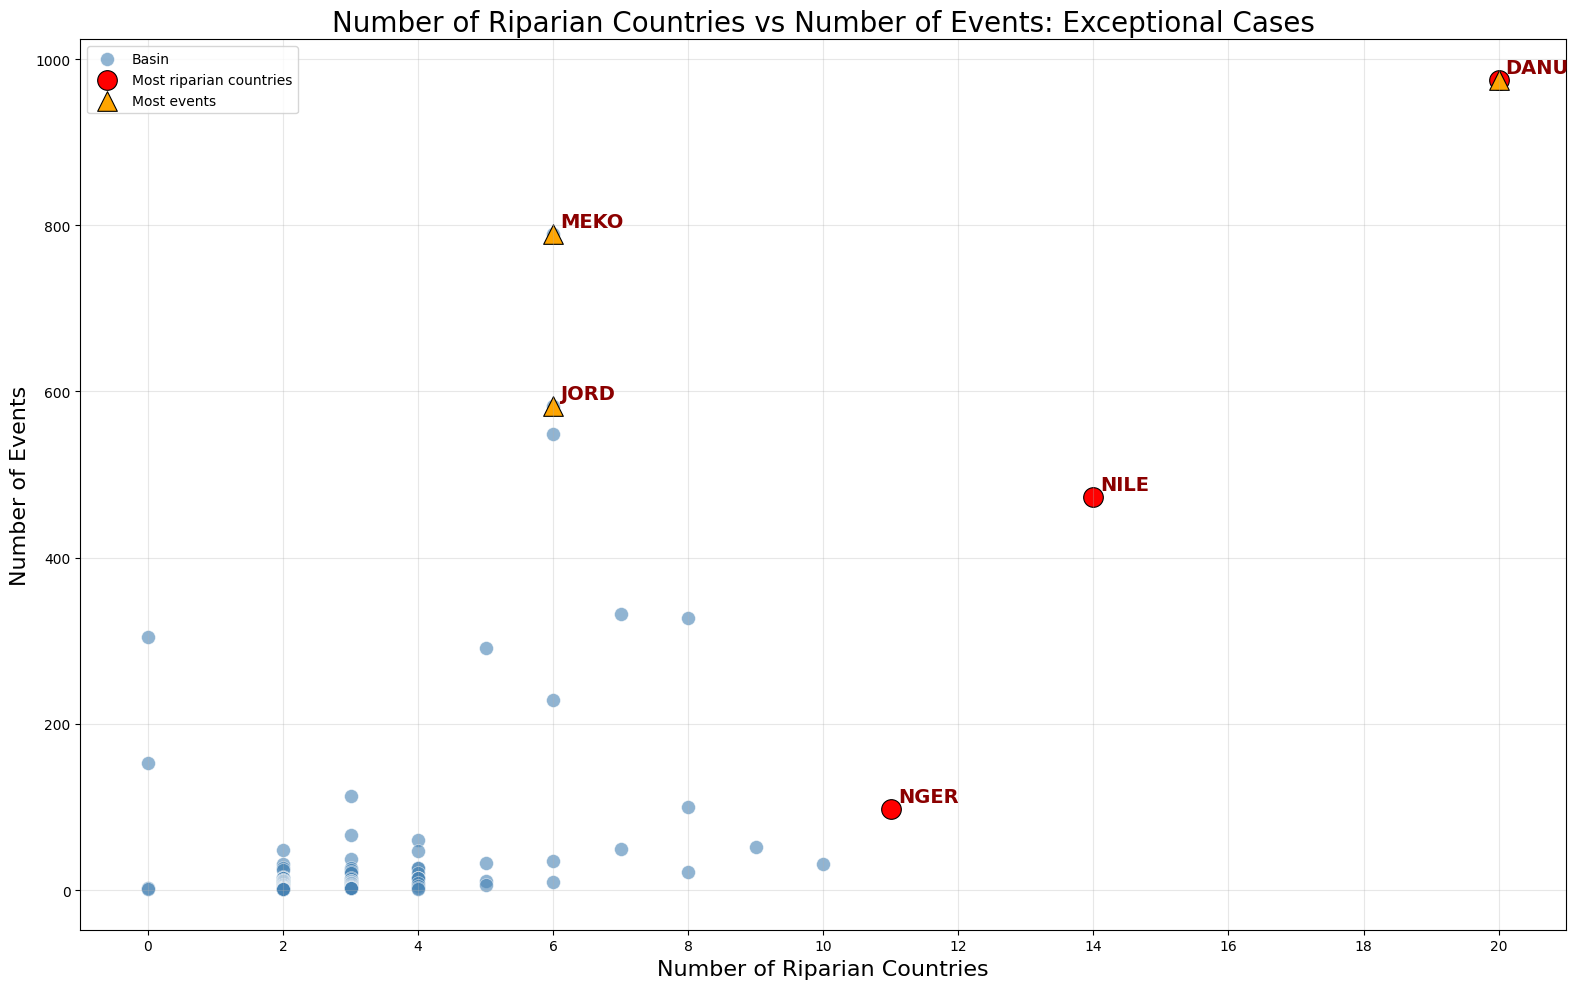

In [44]:
# Convert to numeric first (in case of data type issues)
riparian_events['riparian_count'] = pd.to_numeric(riparian_events['riparian_count'], errors='coerce')
riparian_events['event_frequency'] = pd.to_numeric(riparian_events['event_frequency'], errors='coerce')

# Get outliers again with numeric data
riparian_outliers = find_outliers_iqr(riparian_events, 'riparian_count')
event_outliers = find_outliers_iqr(riparian_events, 'event_frequency')

# Instead of nlargest, use manual sorting
if len(riparian_outliers) > 0:
    top_riparian_outliers = riparian_outliers.sort_values('riparian_count', ascending=False).head(3)
else:
    top_riparian_outliers = pd.DataFrame()  # Empty DataFrame

if len(event_outliers) > 0:
    top_event_outliers = event_outliers.sort_values('event_frequency', ascending=False).head(3)
else:
    top_event_outliers = pd.DataFrame()  # Empty DataFrame

print(f"Top riparian outliers: {len(top_riparian_outliers)} found")
print(f"Top event outliers: {len(top_event_outliers)} found")

# Create plot with just these extreme cases
plt.figure(figsize=(16, 10))
plt.scatter(riparian_events['riparian_count'], riparian_events['event_frequency'],
            alpha=0.6, s=100, color='steelblue', edgecolors='white', linewidth=0.5, label='Basin')

# Highlight only the most extreme outliers
if len(top_riparian_outliers) > 0:
    plt.scatter(top_riparian_outliers['riparian_count'], top_riparian_outliers['event_frequency'],
                s=200, color='red', marker='o', edgecolors='black', linewidth=0.8, label='Most riparian countries')

if len(top_event_outliers) > 0:
    plt.scatter(top_event_outliers['riparian_count'], top_event_outliers['event_frequency'],
                s=200, color='orange', marker='^', edgecolors='black', linewidth=0.8, label='Most events')

# Label only these extreme cases
if len(top_riparian_outliers) > 0 or len(top_event_outliers) > 0:
    all_extreme = pd.concat([top_riparian_outliers, top_event_outliers]).drop_duplicates(subset=['BCODE'])
    for _, row in all_extreme.iterrows():
        plt.annotate(row['BCODE'], (row['riparian_count'], row['event_frequency']),
                     xytext=(5, 5), textcoords='offset points', fontsize=14, color='darkred', weight='bold')

plt.xticks(range(0, int(riparian_events['riparian_count'].max()) + 1, 2))
plt.xlabel('Number of Riparian Countries', fontsize=16)
plt.ylabel('Number of Events', fontsize=16)
plt.title('Number of Riparian Countries vs Number of Events: Exceptional Cases', fontsize=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Events over time

In [ ]:
#df.head()
# turn date into year
df['YEAR'] = pd.to_datetime(df['DATE'], format='%Y', errors='coerce')
df['YEAR'] = df['YEAR'].astype(str).str[:4]

# make a column from 'DATE' that's just 'YEAR'

In [88]:
df.columns

Index(['ID', 'DATE', 'DYAD_CODE', 'BCode', 'LOCATION', 'CCODE1', 'CCODE2',
       'COUNTRY_LIST', 'BAR_Scale', 'EVENT_SUMMARY', 'Macro_Event',
       'Source_Source', 'YEAR'],
      dtype='object')

In [91]:
columns_idc_about = ['ID']
df.drop(columns=columns_idc_about, inplace=True)
#dropped.head()

In [93]:
df.head()

,DATE,DYAD_CODE,BCode,LOCATION,CCODE1,CCODE2,COUNTRY_LIST,BAR_Scale,EVENT_SUMMARY,Macro_Event,Source_Source,YEAR
0,1948-03-16,EGY_INT,NILE,NILE,EGY,INT,Egypt (internal),3.0,Egypt lays to four foundation stone of Aswan h...,Aswan Dam,Arab World,1948
1,1948-04-01,IND_PAK,INDU,Indus,IND,PAK,India--Pakistan,-3.0,"The ""Standstill Agreement"" between India and P...","Indus Water Sharing, IND-PAK",Wolf - Indus Water Treaty Case Study (Time Line),1948
2,1948-05-04,IND_PAK,INDU,Indus,IND,PAK,India--Pakistan,3.0,At an Inter-Dominian conference between India ...,"Indus Water Sharing, IND-PAK",Wolf - Indus Water Treaty Case Study (Time Line),1948
3,1948-07-08,FRA_ITA,ROIA,ROIA,FRA,ITA,France--Italy,4.0,Italy and France build dam on Roya River in ex...,NaN,Keesing's Contemporary Archives,1948
4,1948-07-30,CZS_GBR,DANU,DANUBE,CZS,GBR,Austria--Czechoslovakia--Great Britain--France...,1.0,"Austria, Czechoslovakia, Great Britain, France...",Danube Joint Management,New Times: A Weekly Journal of World Affairs (...,1948


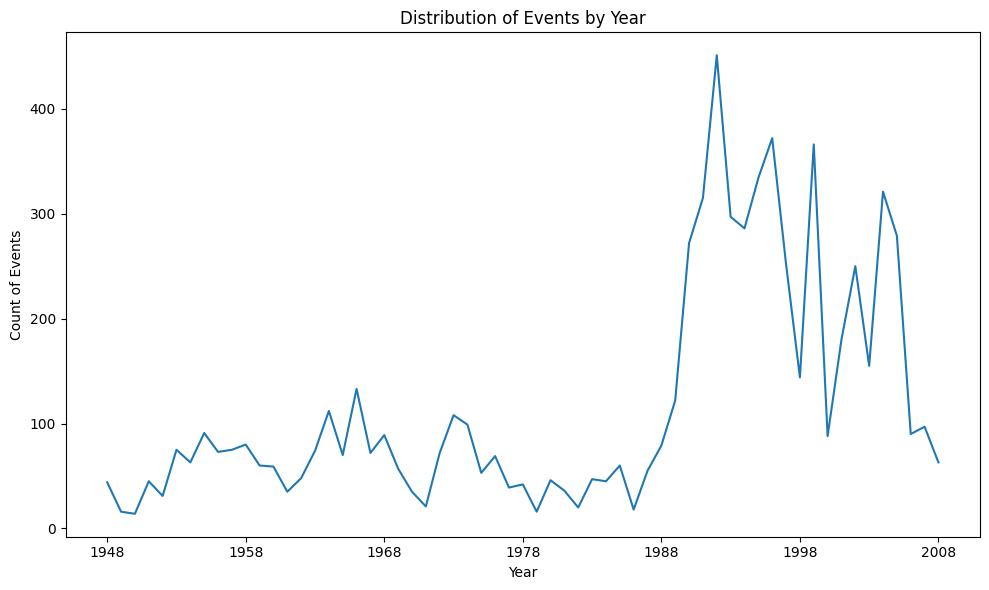

In [109]:
# Convert year to int, dropping any NaT/NaN values
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

# Now plot
year_counts = df['YEAR'].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count of Events')
plt.title('Distribution of Events by Year')
plt.xticks(range(int(df['YEAR'].min()), int(df['YEAR'].max()) + 1, 10))
plt.tight_layout()
plt.show()

## Events from ... sources?

In [113]:
#print(df['Source_Source'].unique())
print(len(df['Source_Source'].unique()))
# wow that's so many
# sort by frequency?
# Calculate value frequencies for the 'bcode' column
source_counts = df['Source_Source'].value_counts()

source_frequency_df = source_counts.to_frame('frequency').reset_index()

# Rename the columns for clarity
source_frequency_df.columns = ['Source', 'Frequency']

print("New DataFrame with Source and Frequency:")
print(source_frequency_df)


511
New DataFrame with Source and Frequency:
                                                Source  Frequency
0    Wolf - The Environmental Program for the Danub...        387
1                                       New York Times        183
2                                           Arab World        174
3                               Asian Recorder (India)        174
4                                  Middle East Journal        160
..                                                 ...        ...
505                              The Nation (Pakistan)          1
506                               The Associated Press          1
507           Real Estate/Environmental Liability News          1
508                                           Danube95          1
509                                       StLawrence17          1

[510 rows x 2 columns]


on sources:
* what are some trends I could look for in sources? 
* - slice/filter by source, get a mean bar scale of all their events
* - maybe not a mean actually ... maybe median or mode (get cursor's suggestion?)
* if I pick out one particular source that I recognize - maybe take an outlier (high/low score) and one that is in a cluster
* - which basins do they report on? 
* - are the basins they rank as high in our high-outliers? etc
* - do they have their roots somewhere they know a lot about? ex. would an outlet like NYT have a lean towards US basins? do they disproportionately report on basins in a particular region?




might also be worthwhile to do a map, potentially of basins coded by color by avg bar scale

would need actual spatial data

https://app.diagrams.net/

could even check these against how many articles we got in the first download phase for each
or after first exclusion round, how many basins have 0 articles?

metrics of similarity from an NLP process reading each article
classifying 

In [114]:
pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   ---- ----------------------------------- 2.4/19.2 MB 11.0 MB/s eta 0:00:02
   --------------------------- ------------ 13.4/19.2 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------  19.1/19.2 MB 27.5 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 20.8 MB/s  0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------  6.3/6.3 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------  6.3/6.3 MB 45.5 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 12.0 MB/s  0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 12.9 MB/s  0:00:00

   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   ---------------------------------------- 0/4 [shapely]
   

In [ ]:
import geopandas as gpd
# make a map, where color intensity is number of events
#maybe do this with arcgis

## News coverage bias: source analysis

In [ ]:
# ===============================================
# ANALYSIS : NEWS COVERAGE BIAS - SOURCE ANALYSIS
# ===============================================

# First, let's understand the diversity of sources
print("=== SOURCE DIVERSITY ===")
print(f"Total unique sources: {df['Source_Source'].nunique()}")
print(f"Total events: {len(df)}")

# Source frequency analysis
source_counts = df['Source_Source'].value_counts()
source_frequency_df = source_counts.to_frame('frequency').reset_index()
source_frequency_df.columns = ['Source', 'frequency']

# Look at most prolific sources
print("\n=== TOP 20 SOURCES BY EVENT COUNT ===")
print(source_frequency_df.head(20))

# Calculate coverage concentration (Gini coefficient or Herfindahl index)
total_events = len(df)
source_frequency_df['proportion'] = source_frequency_df['frequency'] / total_events

# Herfindahl Index (measures concentration - closer to 1 = more concentrated)
herfindahl = (source_frequency_df['proportion']**2).sum()
print(f"\nHerfindahl Index (coverage concentration): {herfindahl:.3f}")
print("(1.0 = single source dominates, 0 = perfectly distributed)")

=== SOURCE DIVERSITY ===
Total unique sources: 510
Total events: 7128

=== TOP 20 SOURCES BY EVENT COUNT ===
                                               Source  frequency
0   Wolf - The Environmental Program for the Danub...        387
1                                      New York Times        183
2                                          Arab World        174
3                              Asian Recorder (India)        174
4                                 Middle East Journal        160
5                              Middle Eastern Affairs        130
6                     Latin American Political Report        126
7                                         Africa News        121
8                     Keesing's Contemporary Archives        119
9                                              Xinhua        116
10                                      Facts on File         99
11                                         Cairo MENA         90
12                                     Beijing

In [126]:
# ===============================================
# SOURCE BIAS BY REGION
# ===============================================

# Create a function to analyze sources by basin/region
def analyze_source_bias(source_name):
    """
    Analyze how a specific source covers different basins and regions
    """
    source_data = df[df['Source_Source'] == source_name]
    
    if len(source_data) == 0:
        print(f"Source '{source_name}' not found")
        return
    
    print(f"\n=== ANALYSIS FOR: {source_name} ===")
    print(f"Total events from this source: {len(source_data)}")
    print(f"Proportion of all events: {len(source_data)/total_events*100:.2f}%")
    
    # BAR Scale distribution for this source
    print(f"\nAverage BAR_Scale: {source_data['BAR_Scale'].mean():.2f}")
    print(f"Median BAR_Scale: {source_data['BAR_Scale'].median():.2f}")
    
    # Bar scale distribution
    print("\nBAR Scale distribution:")
    print(source_data['BAR_Scale'].value_counts().sort_index())
    
    # Top basins covered by this source
    print("\nTop 10 basins covered by this source:")
    basin_coverage = source_data['BCode'].value_counts()
    print(basin_coverage.head(10))
    
    # Regional patterns
    print("\nCountries appearing (CCODE1):")
    print(source_data['CCODE1'].value_counts().head(10))
    
    return source_data

def analyze_source(source_number):
    source = source_frequency_df.iloc[source_number]['Source']
    print(f"\n{'='*60}")
    print(f"ANALYZING SOURCE: {source}")
    print('='*60)
    source_data = analyze_source_bias(source)

# Analyze the most prolific source
analyze_source(0) # 0 because it's the top one


ANALYZING SOURCE: Wolf - The Environmental Program for the Danube River Case Study

=== ANALYSIS FOR: Wolf - The Environmental Program for the Danube River Case Study ===
Total events from this source: 387
Proportion of all events: 5.43%

Average BAR_Scale: 2.09
Median BAR_Scale: 2.00

BAR Scale distribution:
BAR_Scale
1.0     78
2.0    281
6.0     28
Name: count, dtype: int64

Top 10 basins covered by this source:
BCode
DANU    387
Name: count, dtype: int64

Countries appearing (CCODE1):
CCODE1
AUT    65
BGR    59
CZS    45
DEU    43
HRV    34
HUN    32
EEC    24
MDA    24
ROM    17
OTH    12
Name: count, dtype: int64


In [127]:
analyze_source(1)


ANALYZING SOURCE: New York Times

=== ANALYSIS FOR: New York Times ===
Total events from this source: 183
Proportion of all events: 2.57%

Average BAR_Scale: 0.01
Median BAR_Scale: 1.00

BAR Scale distribution:
BAR_Scale
-7.0     1
-6.0     9
-5.0    12
-4.0     2
-3.0     8
-2.0    34
-1.0    12
 0.0     7
 1.0    30
 2.0    16
 3.0    20
 4.0    28
Name: count, dtype: int64

Top 10 basins covered by this source:
BCode
NTAP    36
UNKN    32
JORD    30
SLAW    12
NILE     8
NITL     7
GJLV     6
SENG     6
CLDO     6
CNCS     5
Name: count, dtype: int64

Countries appearing (CCODE1):
CCODE1
ISR    19
CAN    18
MEX    16
CHN    16
EGY    13
OTH     6
BOL     6
IRN     5
USA     5
IND     4
Name: count, dtype: int64


In [128]:
analyze_source(2)


ANALYZING SOURCE: Arab World

=== ANALYSIS FOR: Arab World ===
Total events from this source: 174
Proportion of all events: 2.44%

Average BAR_Scale: 1.47
Median BAR_Scale: 1.00

BAR Scale distribution:
BAR_Scale
-6.0     3
-5.0     3
-4.0     1
-3.0     6
-2.0    12
-1.0     7
 0.0     3
 1.0    57
 2.0     8
 3.0    29
 4.0    43
 5.0     2
Name: count, dtype: int64

Top 10 basins covered by this source:
BCode
JORD    75
NILE    45
UNKN    28
TIGR    16
NITL     6
NTAP     3
MDJD     1
Name: count, dtype: int64

Countries appearing (CCODE1):
CCODE1
EGY    55
ISR    26
JOR    23
IRQ    14
LBN    12
GBR    11
SYR     7
MAR     4
FRA     3
SAU     3
Name: count, dtype: int64


In [129]:
# ===============================================
# SOURCE GEOGRAPHIC BIAS
# ===============================================

# For each source, what basins do they cover?
def get_source_basin_coverage():
    """
    Create a matrix of source-by-basin coverage
    """
    source_basin_crosstab = pd.crosstab(df['Source_Source'], df['BCode'])
    return source_basin_crosstab

source_basin_matrix = get_source_basin_coverage()

# Identify sources that are more/less "global" in coverage
# Global sources cover many basins, specialized sources cover few
source_coverage_breadth = source_basin_matrix.apply(lambda x: (x > 0).sum(), axis=1)
source_coverage_breadth = source_coverage_breadth.sort_values(ascending=False)

print("\n=== SOURCES BY COVERAGE BREADTH ===")
print("Most global sources (cover most basins):")
print(source_coverage_breadth.head(15))
print("\nMost specialized sources (cover few basins):")
print(source_coverage_breadth.tail(15))


=== SOURCES BY COVERAGE BREADTH ===
Most global sources (cover most basins):
Source_Source
Moscow ITAR-TASS                                       27
New York Times                                         25
Keesing's Contemporary Archives                        20
Facts on File                                          19
Warsaw PAP                                             17
Asian Recorder (India)                                 16
BBC                                                    15
Paris AFP                                              13
Africa News                                            12
New Times: A Weekly Journal of World Affairs (USSR)     9
Middle East Journal                                     9
Beijing Xinhua                                          9
Beijing XINHUA                                          9
Moscow ITAR-TASS World Service                          8
Ankara Anatolia                                         8
dtype: int64

Most specialized sources

In [130]:

# ===============================================
# SOURCE CONFLICT BIAS
# ===============================================

# Do different sources report differently on conflict vs cooperation?
def analyze_source_conflict_bias():
    """
    For each source, calculate proportion of conflict vs cooperation events
    """
    source_bias = []
    
    for source in df['Source_Source'].unique():
        source_df = df[df['Source_Source'] == source]
        if len(source_df) < 5:  # Skip sources with very few events
            continue
        
        conflict_events = len(source_df[source_df['BAR_Scale'] < 0])
        cooperation_events = len(source_df[source_df['BAR_Scale'] > 0])
        total = len(source_df)
        
        source_bias.append({
            'Source': source,
            'Total_Events': total,
            'Conflict_Count': conflict_events,
            'Cooperation_Count': cooperation_events,
            'Conflict_Pct': (conflict_events/total)*100,
            'Cooperation_Pct': (cooperation_events/total)*100,
            'Avg_BAR_Scale': source_df['BAR_Scale'].mean()
        })
    
    bias_df = pd.DataFrame(source_bias)
    return bias_df.sort_values('Total_Events', ascending=False)

source_bias_analysis = analyze_source_conflict_bias()
print("\n=== SOURCE CONFLICT BIAS ===")
print(source_bias_analysis.head(20))

# Identify sources with conflict vs cooperation skew
print("\nMost conflict-focused sources (>60% conflict):")
print(source_bias_analysis[source_bias_analysis['Conflict_Pct'] > 60][['Source', 'Total_Events', 'Conflict_Pct', 'Avg_BAR_Scale']].head(10))

print("\nMost cooperation-focused sources (>60% cooperation):")
print(source_bias_analysis[source_bias_analysis['Cooperation_Pct'] > 60][['Source', 'Total_Events', 'Cooperation_Pct', 'Avg_BAR_Scale']].head(10))



=== SOURCE CONFLICT BIAS ===
                                                Source  Total_Events  \
58   Wolf - The Environmental Program for the Danub...           387   
4                                       New York Times           183   
0                                           Arab World           174   
14                              Asian Recorder (India)           174   
10                                 Middle East Journal           160   
8                               Middle Eastern Affairs           130   
23                     Latin American Political Report           126   
139                                        Africa News           121   
2                      Keesing's Contemporary Archives           119   
165                                             Xinhua           116   
6                                        Facts on File            99   
59                                          Cairo MENA            90   
64                                

In [132]:
spatial_df.columns

Index(['BCODE', 'Basin_Name', 'Continent_', 'Area_km2', 'Pop_2007',
       'PopDen2007', 'Pop_2012', 'PopDen2012', 'Pop_2015', 'PopDen2015',
       'Pop_2020', 'PopDen2020', 'Dams_Exist', 'Dam_Plnd', 'Dam_Plnd20',
       'runoff', 'withdrawal', 'consumptio', 'HydroPolTe', 'NumberRipa',
       'Riparian_C', 'Count_of_T', 'Count_of_R', 'Wetlands_k', 'Events__19',
       'Paired_Int', 'EstDam24', 'Pop_2022', 'PopDen2022'],
      dtype='object')

In [131]:

# ===============================================
# BASIN COVERAGE COMPARISON
# ===============================================

# Which basins are over-represented vs under-represented?
# We have spatial_df with basin info - let's compare coverage

def analyze_basin_coverage_relative_to_importance():
    """
    Compare event coverage vs basin importance (area, population, etc.)
    """
    # Merge event data with spatial data
    basin_event_counts = df['BCode'].value_counts().reset_index()
    basin_event_counts.columns = ['BCODE', 'Event_Count']
    
    # Merge with spatial data
    coverage_analysis = spatial_df.merge(basin_event_counts, on='BCODE', how='left')
    coverage_analysis['Event_Count'] = coverage_analysis['Event_Count'].fillna(0)
    
    # Calculate events per unit of "importance"
    coverage_analysis['Events_per_1000km2'] = coverage_analysis['Event_Count'] / (coverage_analysis['Area_km2'] / 1000)
    coverage_analysis['Events_per_Million_Pop'] = coverage_analysis['Event_Count'] / (coverage_analysis['Pop_2007'] / 1e6)
    
    # Identify outliers
    # Over-covered: many events relative to size/population
    # Under-covered: few events relative to size/population
    
    print("\n=== BASIN COVERAGE RELATIVE TO SIZE ===")
    print("\nMost over-covered basins (high event density per 1000 km²):")
    over_covered = coverage_analysis.nlargest(10, 'Events_per_1000km2')[['BCODE', 'Basin_Name', 'Area_km2', 'Event_Count', 'Events_per_1000km2']]
    print(over_covered)
    
    print("\nMost under-covered basins (low event density per 1000 km²):")
    under_covered = coverage_analysis[coverage_analysis['Area_km2'] > 10000].nsmallest(10, 'Events_per_1000km2')[['BCODE', 'Basin_Name', 'Area_km2', 'Event_Count', 'Events_per_1000km2']]
    print(under_covered)
    
    return coverage_analysis

basin_coverage = analyze_basin_coverage_relative_to_importance()


=== BASIN COVERAGE RELATIVE TO SIZE ===

Most over-covered basins (high event density per 1000 km²):
    BCODE     Basin_Name  Area_km2  Event_Count  Events_per_1000km2
27   BNGU         Bangau       130          6.0           46.153846
118  JORD         Jordan     45005        583.0           12.954116
14   ATCY    Astara Chay       402          4.0            9.950249
186  NHRK  Nahr El Kebir      1598          6.0            3.754693
83   FNNY         Fenney      3028         11.0            3.632761
283  TUMN          Tumen     33345        113.0            3.388814
134  LIMA           Lima      2469          8.0            3.240178
277  TIJU        Tijuana      4430         14.0            3.160271
232  ROIA           Roia       696          2.0            2.873563
226  REZV        Rezvaya       771          2.0            2.594034

Most under-covered basins (low event density per 1000 km²):
   BCODE   Basin_Name  Area_km2  Event_Count  Events_per_1000km2
0   LOAX          Loa   

## Temporal patterns

In [133]:
# ===============================================
# ANALYSIS #3: TEMPORAL PATTERNS
# ===============================================

# Ensure we have YEAR column (you've already created this)
print(f"Date range: {df['DATE'].min()} to {df['DATE'].max()}")

# Create time series analysis
df['YEAR'] = pd.to_datetime(df['DATE']).dt.year

Date range: 1948-03-16 00:00:00 to 2008-10-25 00:00:00


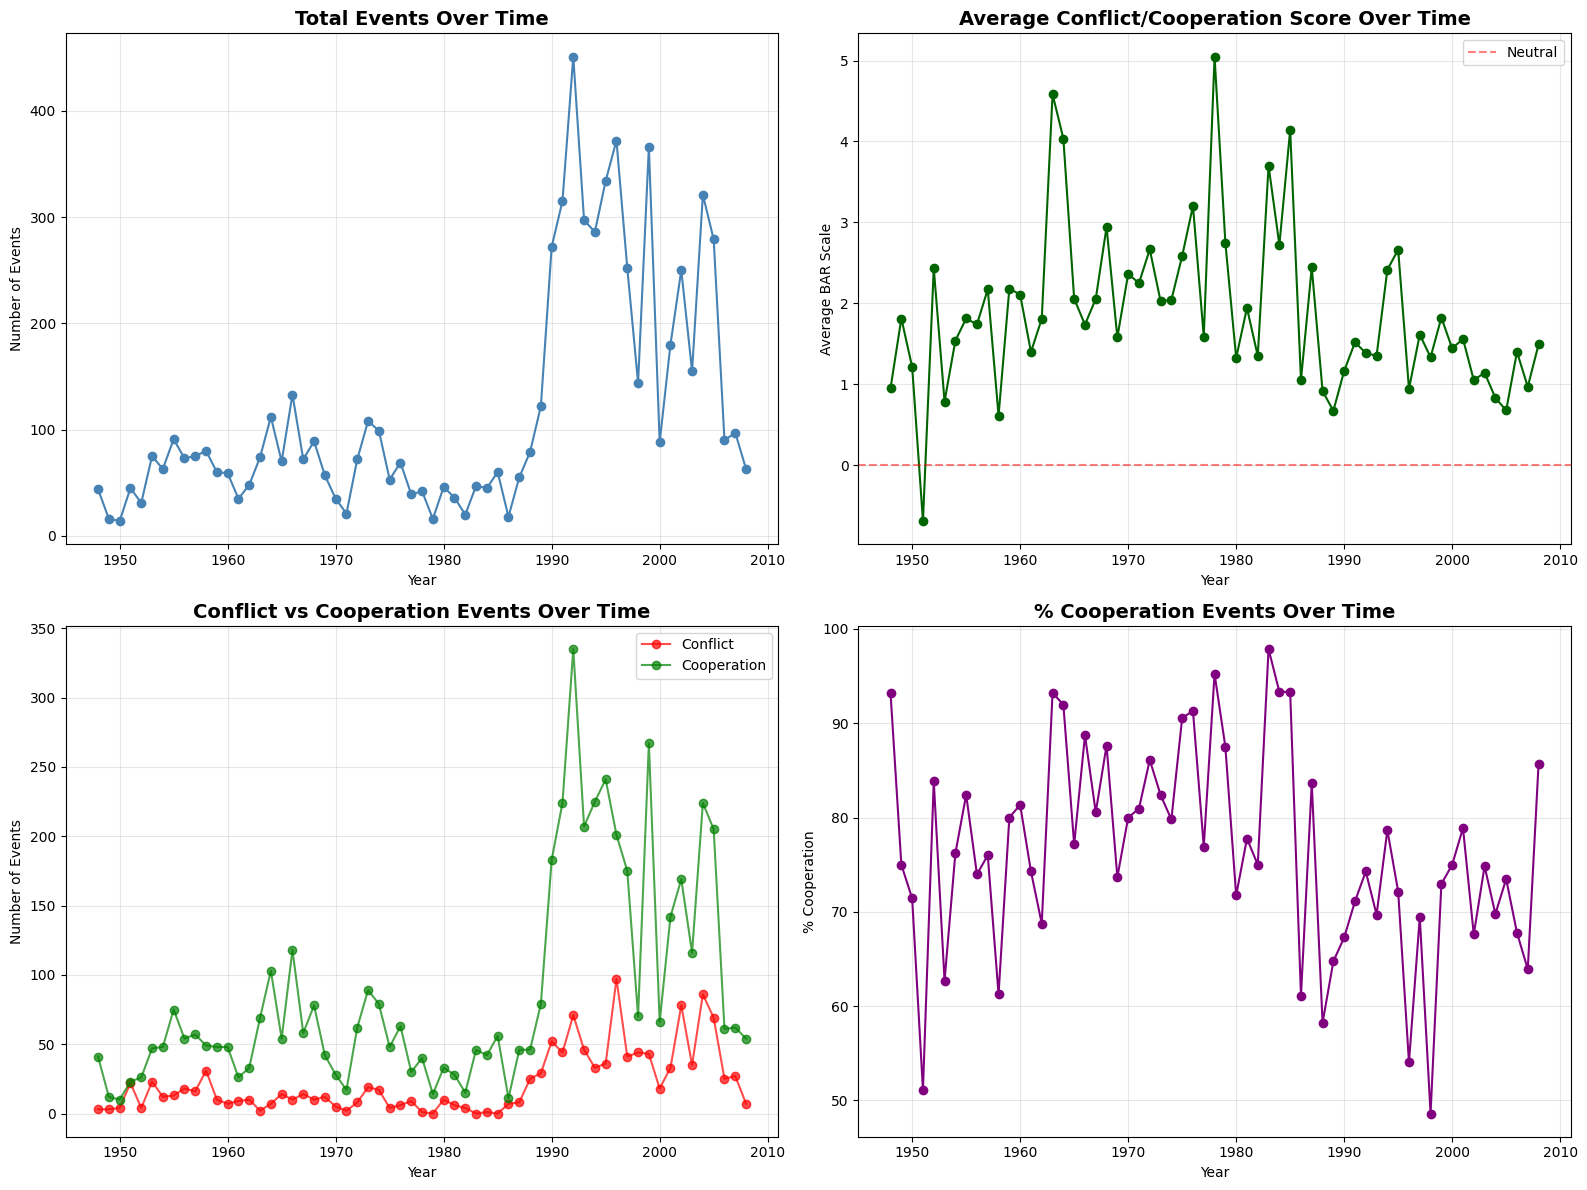

In [134]:
# ===============================================
# TEMPORAL TRENDS
# ===============================================

# Aggregate by year
yearly_events = df.groupby('YEAR').size()
yearly_avg_bar = df.groupby('YEAR')['BAR_Scale'].mean()
yearly_conflict = df[df['BAR_Scale'] < 0].groupby('YEAR').size()
yearly_cooperation = df[df['BAR_Scale'] > 0].groupby('YEAR').size()

# Combine into one dataframe
temporal_trends = pd.DataFrame({
    'Total_Events': yearly_events,
    'Avg_BAR_Scale': yearly_avg_bar,
    'Conflict_Events': yearly_conflict,
    'Cooperation_Events': yearly_cooperation
}).fillna(0)

# Plot temporal trends
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total events over time
axes[0, 0].plot(temporal_trends.index, temporal_trends['Total_Events'], marker='o', color='steelblue')
axes[0, 0].set_title('Total Events Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Events')
axes[0, 0].grid(True, alpha=0.3)

# Average BAR Scale over time
axes[0, 1].plot(temporal_trends.index, temporal_trends['Avg_BAR_Scale'], marker='o', color='darkgreen')
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Neutral')
axes[0, 1].set_title('Average Conflict/Cooperation Score Over Time', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average BAR Scale')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# Conflict vs Cooperation over time
axes[1, 0].plot(temporal_trends.index, temporal_trends['Conflict_Events'], marker='o', label='Conflict', color='red', alpha=0.7)
axes[1, 0].plot(temporal_trends.index, temporal_trends['Cooperation_Events'], marker='o', label='Cooperation', color='green', alpha=0.7)
axes[1, 0].set_title('Conflict vs Cooperation Events Over Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Percentage cooperation over time
temporal_trends['Cooperation_Pct'] = (temporal_trends['Cooperation_Events'] / temporal_trends['Total_Events']) * 100
axes[1, 1].plot(temporal_trends.index, temporal_trends['Cooperation_Pct'], marker='o', color='purple')
axes[1, 1].set_title('% Cooperation Events Over Time', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('% Cooperation')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [135]:
# ===============================================
# DECADAL COMPARISON
# ===============================================

# Break down by decade
df['DECADE'] = (df['YEAR'] // 10) * 10

decadal_stats = df.groupby('DECADE').agg({
    'BAR_Scale': ['mean', 'count'],
    'BCode': 'nunique'  # number of unique basins
}).round(2)

decadal_stats.columns = ['Avg_BAR_Scale', 'Total_Events', 'Unique_Basins']
print("\n=== DECADAL STATISTICS ===")
print(decadal_stats)


=== DECADAL STATISTICS ===
        Avg_BAR_Scale  Total_Events  Unique_Basins
DECADE                                            
1940.0           1.18            60             11
1950.0           1.40           606             28
1960.0           2.57           742             44
1970.0           2.56           548             38
1980.0           1.94           501             49
1990.0           1.63          2810            114
2000.0           1.06          1523             69


In [136]:
# ===============================================
# CASCADING EVENTS - FLASHPOINT ANALYSIS
# ===============================================

def find_flashpoints(df, window_days=365):
    """
    Identify periods where events cluster in time within the same basin
    A flashpoint is defined as multiple events in a basin within a time window
    """
    df_sorted = df.sort_values(['BCode', 'DATE'])
    df_sorted['EVENT_ORDER'] = df_sorted.groupby('BCode').cumcount()
    
    # Calculate time since last event in same basin
    df_sorted['DAYS_SINCE_LAST'] = df_sorted.groupby('BCode')['DATE'].diff().dt.days
    
    # Identify events that are part of a sequence (within window)
    df_sorted['IS_FLASHPOINT'] = df_sorted['DAYS_SINCE_LAST'] <= window_days
    df_sorted['IS_FLASHPOINT'] = df_sorted['IS_FLASHPOINT'].fillna(False)
    
    return df_sorted

df_with_flashpoints = find_flashpoints(df)

print("\n=== FLASHPOINT ANALYSIS ===")
print(f"Total events that are part of flashpoints: {df_with_flashpoints['IS_FLASHPOINT'].sum()}")
print(f"Percentage of events that are flashpoints: {df_with_flashpoints['IS_FLASHPOINT'].sum()/len(df)*100:.1f}%")

# Basins with most flashpoints
basin_flashpoints = df_with_flashpoints[df_with_flashpoints['IS_FLASHPOINT']].groupby('BCode').size().sort_values(ascending=False)
print("\nTop 10 basins by flashpoint events:")
print(basin_flashpoints.head(10))

# Do flashpoint events tend to be more conflictual?
print("\nBAR Scale comparison:")
print(f"Average BAR Scale for flashpoint events: {df_with_flashpoints[df_with_flashpoints['IS_FLASHPOINT']]['BAR_Scale'].mean():.2f}")
print(f"Average BAR Scale for isolated events: {df_with_flashpoints[~df_with_flashpoints['IS_FLASHPOINT']]['BAR_Scale'].mean():.2f}")



=== FLASHPOINT ANALYSIS ===
Total events that are part of flashpoints: 6515
Percentage of events that are flashpoints: 91.4%

Top 10 basins by flashpoint events:
BCode
DANU    962
MEKO    773
JORD    575
TIGR    534
UNKN    527
NILE    463
INDU    320
GANG    315
NTAP    296
LPTA    278
dtype: int64

BAR Scale comparison:
Average BAR Scale for flashpoint events: 1.63
Average BAR Scale for isolated events: 2.21


In [137]:
# ===============================================
# SEASONAL PATTERNS
# ===============================================

df['MONTH'] = pd.to_datetime(df['DATE']).dt.month
df['SEASON'] = df['MONTH'].map({12: 'Winter', 1: 'Winter', 2: 'Winter',
                               3: 'Spring', 4: 'Spring', 5: 'Spring',
                               6: 'Summer', 7: 'Summer', 8: 'Summer',
                               9: 'Fall', 10: 'Fall', 11: 'Fall'})

seasonal_analysis = df.groupby('SEASON').agg({
    'BAR_Scale': ['mean', 'std', 'count']
}).round(2)

print("\n=== SEASONAL PATTERNS ===")
print(seasonal_analysis)


=== SEASONAL PATTERNS ===
       BAR_Scale            
            mean   std count
SEASON                      
Fall        1.76  2.16  1784
Spring      1.46  2.36  1580
Summer      1.85  2.46  1585
Winter      1.63  2.27  1841


## Spatial & Basin Geography

In [ ]:

# ===============================================
# BASIN CHARACTERISTICS VS EVENT PATTERNS
# ===============================================

# Merge events data with spatial attributes
basin_event_stats = df.groupby('BCode').agg({
    'BAR_Scale': ['mean', 'count', 'std'],
    'CCODE1': 'nunique',  # number of unique countries involved
}).round(2)

basin_event_stats.columns = ['Avg_BAR_Scale', 'Event_Count', 'BAR_Std', 'Unique_Countries']

# Merge with spatial data
basin_analysis = spatial_df.merge(basin_event_stats, left_on='BCODE', right_index=True, how='left')

# Identify conflict-prone vs cooperation-prone basins
basin_analysis['Conflict_Tendency'] = basin_analysis['Avg_BAR_Scale'].apply(
    lambda x: 'High Conflict' if x < -2 
    else 'Low Conflict' if x < 0 
    else 'Cooperative' if x > 2 
    else 'Neutral'
)

In [139]:
# ===============================================
# BASIN SIZE & IMPORTANCE VS EVENT COVERAGE
# ===============================================

# Relationship between basin area and event coverage
print("=== BASIN SIZE VS COVERAGE ===")
print(basin_analysis[['Basin_Name', 'Area_km2', 'Event_Count', 'Avg_BAR_Scale']].sort_values('Area_km2', ascending=False).head(15))

# Correlation analysis
basin_analysis_numeric = basin_analysis[['Area_km2', 'Pop_2007', 'Event_Count', 'Avg_BAR_Scale', 'NumberRipa']].corr()
print("\nCorrelation matrix:")
print(basin_analysis_numeric)


=== BASIN SIZE VS COVERAGE ===
                    Basin_Name  Area_km2  Event_Count  Avg_BAR_Scale
7                       Amazon   5952595         49.0           4.61
48                 Congo/Zaire   3688888         29.0           2.93
169                Mississippi   3264759          1.0           6.00
194                         Ob   3047571         19.0           0.63
156                   La Plata   2981517        290.0           2.18
187                       Nile   2961325        466.0           1.67
136                  Lake Chad   2596866         22.0           4.77
304            Jenisej/Yenisey   2504604          NaN            NaN
185                      Niger   2132247         97.0           4.94
6                         Amur   2092690         46.0           1.80
89   Ganges-Brahmaputra-Meghna   1661973        313.0           1.06
294                      Volga   1411749          5.0           1.60
307                    Zambezi   1374975         94.0           3.88
11 

In [140]:
# ===============================================
# CONFLICT vs COOPERATION BY BASIN
# ===============================================

# For each basin, calculate conflict vs cooperation breakdown
basin_conflict_coop = df.groupby('BCode').apply(
    lambda x: pd.Series({
        'Total_Events': len(x),
        'Conflict_Count': len(x[x['BAR_Scale'] < 0]),
        'Cooperation_Count': len(x[x['BAR_Scale'] > 0]),
        'Neutral_Count': len(x[x['BAR_Scale'] == 0]),
        'Avg_BAR_Scale': x['BAR_Scale'].mean(),
        'Conflict_Pct': len(x[x['BAR_Scale'] < 0]) / len(x) * 100
    })
).sort_values('Total_Events', ascending=False)

print("\n=== BASIN CONFLICT vs COOPERATION PROFILE ===")
print(basin_conflict_coop.head(15))

# Identify "conflict basins" vs "cooperation basins"
print("\nMost conflict-prone basins (>50% conflict events):")
conflict_basins = basin_conflict_coop[basin_conflict_coop['Conflict_Pct'] > 50].sort_values('Conflict_Pct', ascending=False)
print(conflict_basins.head(10))

print("\nMost cooperation-prone basins (>50% cooperation events):")
cooperation_basins = basin_conflict_coop[basin_conflict_coop['Cooperation_Pct'] > 50].sort_values('Cooperation_Count', ascending=False)
print(cooperation_basins.head(10))

C:\Users\Shared Waters Lab\AppData\Local\Temp\ipykernel_20584\1463595177.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  basin_conflict_coop = df.groupby('BCode').apply(



=== BASIN CONFLICT vs COOPERATION PROFILE ===
       Total_Events  Conflict_Count  Cooperation_Count  Neutral_Count  \
BCode                                                                   
DANU          975.0           103.0              820.0           36.0   
MEKO          790.0            90.0              662.0           23.0   
JORD          583.0           222.0              296.0           36.0   
TIGR          549.0           201.0              252.0           54.0   
UNKN          531.0            52.0              422.0            3.0   
NILE          473.0            82.0              375.0            9.0   
INDU          332.0           121.0              201.0            7.0   
GANG          327.0            79.0              212.0           22.0   
NTAP          304.0            66.0              187.0           10.0   
LPTA          291.0            28.0              245.0           17.0   
ARAL          229.0            11.0              212.0            1.0   
NITL

KeyError: 'Cooperation_Pct'

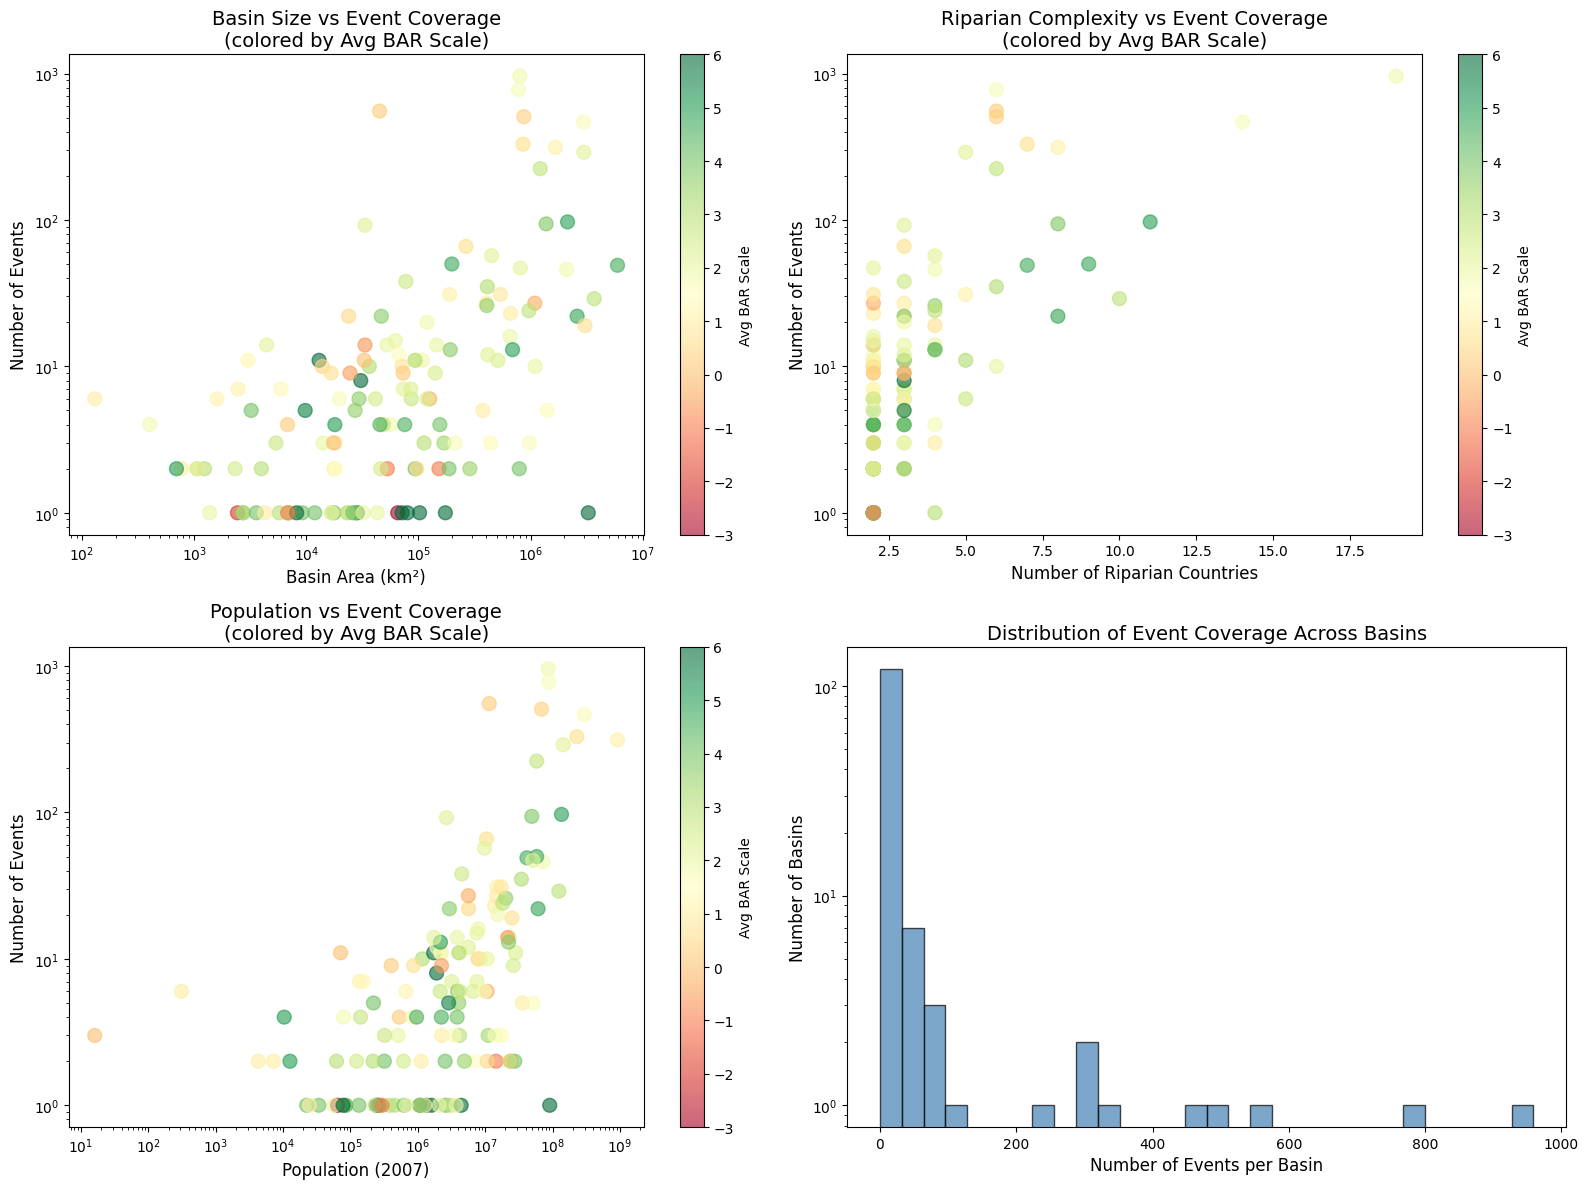

In [141]:
# ===============================================
# VISUALIZATION: BASIN CONFLICT MAP
# ===============================================

# Create a scatter plot of basin characteristics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Basin size vs event count
axes[0, 0].scatter(basin_analysis['Area_km2'], basin_analysis['Event_Count'], 
                   c=basin_analysis['Avg_BAR_Scale'], cmap='RdYlGn', alpha=0.6, s=100)
axes[0, 0].set_xlabel('Basin Area (km²)', fontsize=12)
axes[0, 0].set_ylabel('Number of Events', fontsize=12)
axes[0, 0].set_title('Basin Size vs Event Coverage\n(colored by Avg BAR Scale)', fontsize=14)
axes[0, 0].set_xscale('log')
axes[0, 0].set_yscale('log')
plt.colorbar(axes[0, 0].collections[0], ax=axes[0, 0], label='Avg BAR Scale')

# 2. Number of riparian countries vs event count
axes[0, 1].scatter(basin_analysis['NumberRipa'], basin_analysis['Event_Count'],
                   c=basin_analysis['Avg_BAR_Scale'], cmap='RdYlGn', alpha=0.6, s=100)
axes[0, 1].set_xlabel('Number of Riparian Countries', fontsize=12)
axes[0, 1].set_ylabel('Number of Events', fontsize=12)
axes[0, 1].set_title('Riparian Complexity vs Event Coverage\n(colored by Avg BAR Scale)', fontsize=14)
axes[0, 1].set_yscale('log')
plt.colorbar(axes[0, 1].collections[0], ax=axes[0, 1], label='Avg BAR Scale')

# 3. Population vs event count
axes[1, 0].scatter(basin_analysis['Pop_2007'], basin_analysis['Event_Count'],
                   c=basin_analysis['Avg_BAR_Scale'], cmap='RdYlGn', alpha=0.6, s=100)
axes[1, 0].set_xlabel('Population (2007)', fontsize=12)
axes[1, 0].set_ylabel('Number of Events', fontsize=12)
axes[1, 0].set_title('Population vs Event Coverage\n(colored by Avg BAR Scale)', fontsize=14)
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')
plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0], label='Avg BAR Scale')

# 4. Event frequency distribution
axes[1, 1].hist(basin_analysis['Event_Count'].dropna(), bins=30, color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Number of Events per Basin', fontsize=12)
axes[1, 1].set_ylabel('Number of Basins', fontsize=12)
axes[1, 1].set_title('Distribution of Event Coverage Across Basins', fontsize=14)
axes[1, 1].set_yscale('log')

plt.tight_layout()
plt.show()


## Case Study Removal

In [143]:
# ===============================================
# FILTER OUT CASE STUDY SOURCES
# ===============================================
# Remove Wolf case studies and any other curated case studies to focus on news coverage

# Identify sources that contain "Wolf" or "case study" (case insensitive)
case_study_mask = df['Source_Source'].str.contains('Wolf|case study', case=False, na=False)

print(f"Total events: {len(df)}")
print(f"Events from Wolf/case study sources: {case_study_mask.sum()}")
print(f"Events remaining after filtering: {len(df) - case_study_mask.sum()}")

# Show which sources are being filtered
case_study_sources = df[case_study_mask]['Source_Source'].unique()
print(f"\nSources being filtered out ({len(case_study_sources)} sources):")
for source in case_study_sources:
    count = len(df[df['Source_Source'] == source])
    print(f"  - {source}: {count} events")

# Create filtered dataframe WITHOUT case studies
df_filtered = df[~case_study_mask].copy()

print(f"\nFiltered dataset: {len(df_filtered)} events ({len(df_filtered)/len(df)*100:.1f}% of original)")


Total events: 7128
Events from Wolf/case study sources: 548
Events remaining after filtering: 6580

Sources being filtered out (14 sources):
  - Wolf - Indus Water Treaty Case Study (Time Line): 29 events
  - Wolf-Lesotho Highlands Case Study: 3 events
  - Wolf-Ganges Timeline: 10 events
  - Wolf - Mekong Committee Case Study (Time Line): 71 events
  - Wolf - The Nile Waters Agreement Case Study (Time Line): 7 events
  - Wolf-US/Mexico Shared Aquifers Case Study: 1 events
  - response e-mails to Wolf's inquiry to H-Net Diplomatic History list: 3 events
  - Case Study: The International Joint Commission: Canada and the United States of America: 2 events
  - Wolf-Euphrates Case Study: 13 events
  - Wolf - The Environmental Program for the Danube River Case Study: 387 events
  - Wolf-Salween River Case Study: 1 events
  - Wolf-Multilateral Working Group on Water Timeline: 10 events
  - Wolf-Aral Sea Case Study: 10 events
  - www.kinghussein.gov.jo/peace_annexII.html; Amery and Wolf, 2000,

=== TEMPORAL TRENDS - FILTERED DATA (No Case Studies) ===

Date range: 1948-03-16 00:00:00 to 2008-10-25 00:00:00
Total events in filtered dataset: 6580
Average BAR Scale: 1.65


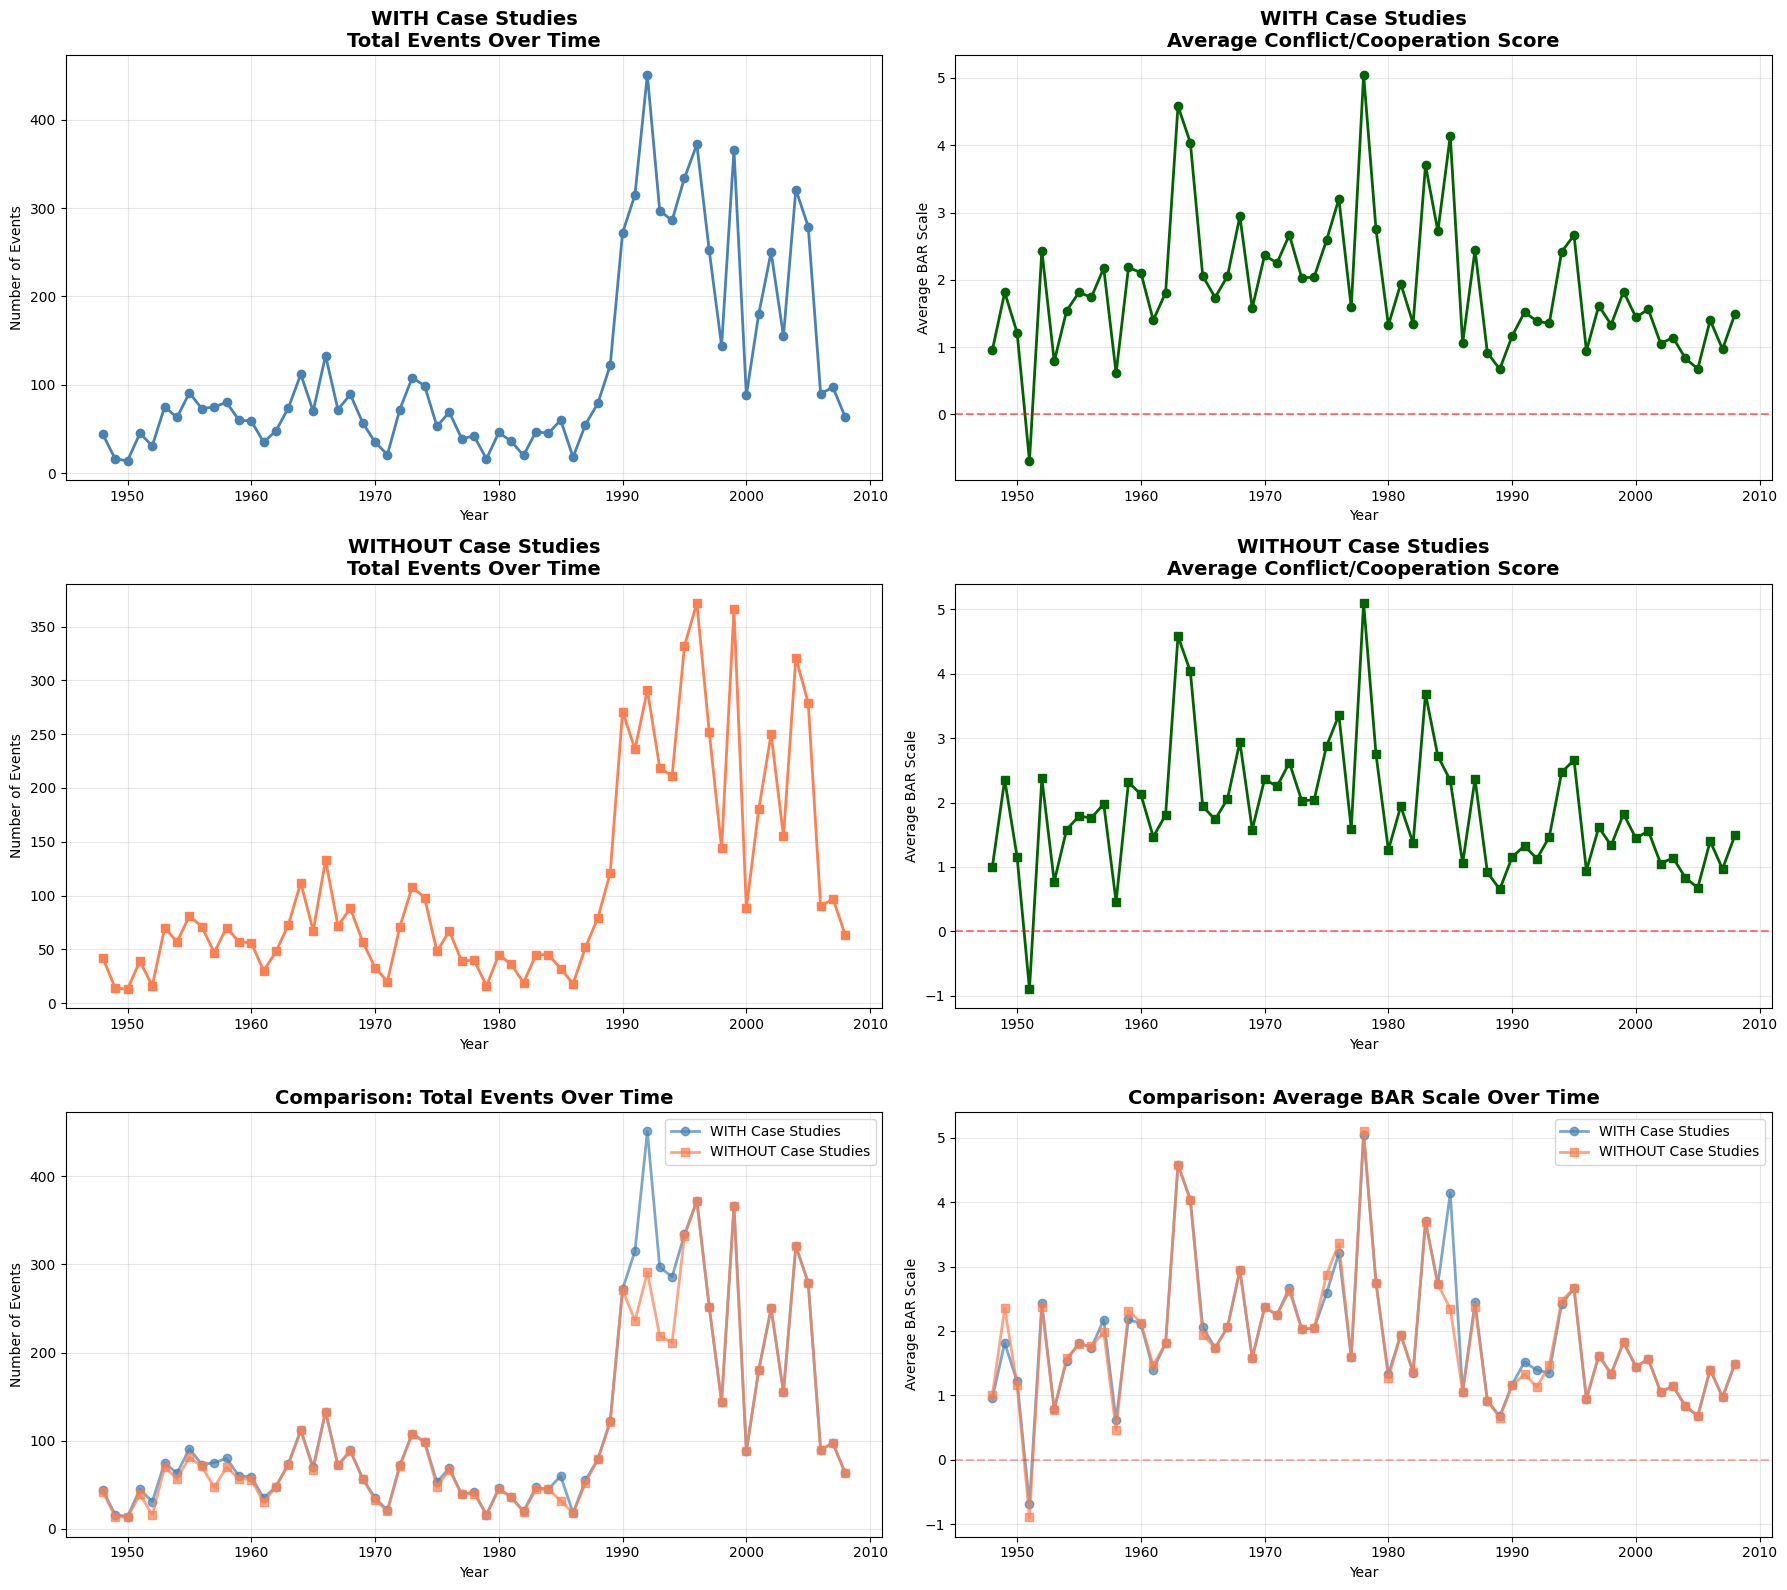


=== COMPARISON: WITH vs WITHOUT Case Studies ===
Overall Average BAR Scale:
  WITH case studies: 1.68
  WITHOUT case studies: 1.65

Difference: 0.03 points


In [144]:
# ===============================================
# TEMPORAL ANALYSIS - WITHOUT CASE STUDIES
# ===============================================

# Aggregate by year for FILTERED data
yearly_events_filtered = df_filtered.groupby('YEAR').size()
yearly_avg_bar_filtered = df_filtered.groupby('YEAR')['BAR_Scale'].mean()
yearly_conflict_filtered = df_filtered[df_filtered['BAR_Scale'] < 0].groupby('YEAR').size()
yearly_cooperation_filtered = df_filtered[df_filtered['BAR_Scale'] > 0].groupby('YEAR').size()

# Combine into one dataframe
temporal_trends_filtered = pd.DataFrame({
    'Total_Events': yearly_events_filtered,
    'Avg_BAR_Scale': yearly_avg_bar_filtered,
    'Conflict_Events': yearly_conflict_filtered,
    'Cooperation_Events': yearly_cooperation_filtered
}).fillna(0)

# Re-create the temporal trends from earlier for comparison
yearly_events = df.groupby('YEAR').size()
yearly_avg_bar = df.groupby('YEAR')['BAR_Scale'].mean()
yearly_conflict = df[df['BAR_Scale'] < 0].groupby('YEAR').size()
yearly_cooperation = df[df['BAR_Scale'] > 0].groupby('YEAR').size()

temporal_trends = pd.DataFrame({
    'Total_Events': yearly_events,
    'Avg_BAR_Scale': yearly_avg_bar,
    'Conflict_Events': yearly_conflict,
    'Cooperation_Events': yearly_cooperation
}).fillna(0)

print("=== TEMPORAL TRENDS - FILTERED DATA (No Case Studies) ===")
print(f"\nDate range: {df_filtered['DATE'].min()} to {df_filtered['DATE'].max()}")
print(f"Total events in filtered dataset: {len(df_filtered)}")
print(f"Average BAR Scale: {df_filtered['BAR_Scale'].mean():.2f}")

# ===============================================
# COMPARATIVE TIMELINE PLOTS
# ===============================================

fig, axes = plt.subplots(3, 2, figsize=(18, 16))

# Row 1: WITH Case Studies
axes[0, 0].plot(temporal_trends.index, temporal_trends['Total_Events'], marker='o', color='steelblue', linewidth=2)
axes[0, 0].set_title('WITH Case Studies\nTotal Events Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Events')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(temporal_trends.index, temporal_trends['Avg_BAR_Scale'], marker='o', color='darkgreen', linewidth=2)
axes[0, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0, 1].set_title('WITH Case Studies\nAverage Conflict/Cooperation Score', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average BAR Scale')
axes[0, 1].grid(True, alpha=0.3)

# Row 2: WITHOUT Case Studies
axes[1, 0].plot(temporal_trends_filtered.index, temporal_trends_filtered['Total_Events'], marker='s', color='coral', linewidth=2)
axes[1, 0].set_title('WITHOUT Case Studies\nTotal Events Over Time', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Events')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(temporal_trends_filtered.index, temporal_trends_filtered['Avg_BAR_Scale'], marker='s', color='darkgreen', linewidth=2)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1, 1].set_title('WITHOUT Case Studies\nAverage Conflict/Cooperation Score', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average BAR Scale')
axes[1, 1].grid(True, alpha=0.3)

# Row 3: SIDE-BY-SIDE COMPARISON
axes[2, 0].plot(temporal_trends.index, temporal_trends['Total_Events'], marker='o', color='steelblue', linewidth=2, label='WITH Case Studies', alpha=0.7)
axes[2, 0].plot(temporal_trends_filtered.index, temporal_trends_filtered['Total_Events'], marker='s', color='coral', linewidth=2, label='WITHOUT Case Studies', alpha=0.7)
axes[2, 0].set_title('Comparison: Total Events Over Time', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Number of Events')
axes[2, 0].legend()
axes[2, 0].grid(True, alpha=0.3)

axes[2, 1].plot(temporal_trends.index, temporal_trends['Avg_BAR_Scale'], marker='o', color='steelblue', linewidth=2, label='WITH Case Studies', alpha=0.7)
axes[2, 1].plot(temporal_trends_filtered.index, temporal_trends_filtered['Avg_BAR_Scale'], marker='s', color='coral', linewidth=2, label='WITHOUT Case Studies', alpha=0.7)
axes[2, 1].axhline(y=0, color='red', linestyle='--', alpha=0.3)
axes[2, 1].set_title('Comparison: Average BAR Scale Over Time', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Average BAR Scale')
axes[2, 1].legend()
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n=== COMPARISON: WITH vs WITHOUT Case Studies ===")
print(f"Overall Average BAR Scale:")
print(f"  WITH case studies: {df['BAR_Scale'].mean():.2f}")
print(f"  WITHOUT case studies: {df_filtered['BAR_Scale'].mean():.2f}")
print(f"\nDifference: {df['BAR_Scale'].mean() - df_filtered['BAR_Scale'].mean():.2f} points")

## BAR scale distribution analysis

In [145]:
# ===============================================
# BAR SCALE DISTRIBUTION ANALYSIS
# ===============================================

# First, let's understand what values we have
print("=== BAR SCALE DISTRIBUTION OVERVIEW ===")
print(f"Total events: {len(df)}")
print(f"Range: {df['BAR_Scale'].min()} to {df['BAR_Scale'].max()}")
print(f"\nValue frequencies:")
value_counts = df['BAR_Scale'].value_counts().sort_index()
print(value_counts)

# Check for zero values
zeros = len(df[df['BAR_Scale'] == 0])
print(f"\nEvents with BAR_Scale = 0: {zeros} ({zeros/len(df)*100:.2f}%)")



=== BAR SCALE DISTRIBUTION OVERVIEW ===
Total events: 7128
Range: -7.0 to 6.0

Value frequencies:
BAR_Scale
-7.0       4
-6.0      31
-5.0      43
-4.0      18
-3.0     121
-2.0     363
-1.0     721
 0.0     273
 1.0    1889
 2.0     907
 3.0     738
 4.0    1149
 5.0      41
 6.0     507
Name: count, dtype: int64

Events with BAR_Scale = 0: 273 (3.83%)


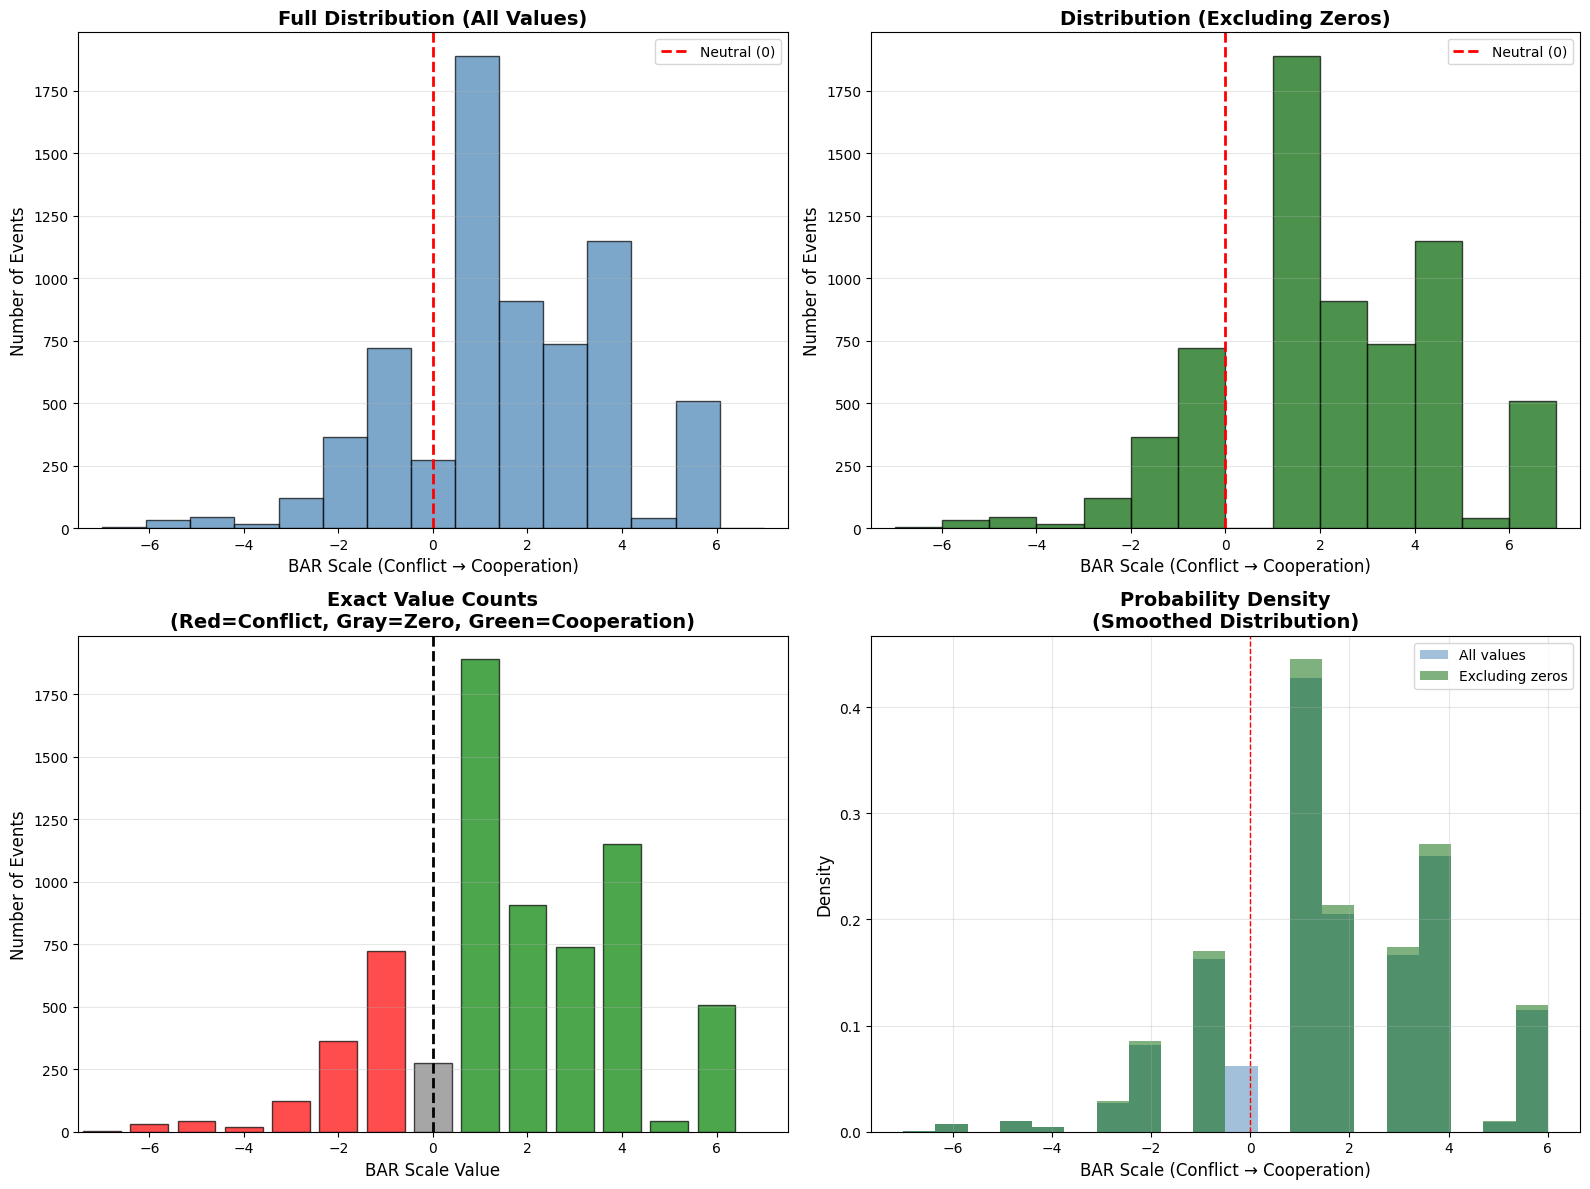

In [146]:
# ===============================================
# MULTIPLE VIEWS OF THE DISTRIBUTION
# ===============================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram - ALL values (including zeros if they exist)
axes[0, 0].hist(df['BAR_Scale'], bins=15, range=(-7, 7), edgecolor='black', color='steelblue', alpha=0.7)
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral (0)')
axes[0, 0].set_xlabel('BAR Scale (Conflict → Cooperation)', fontsize=12)
axes[0, 0].set_ylabel('Number of Events', fontsize=12)
axes[0, 0].set_title('Full Distribution (All Values)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].legend()
axes[0, 0].set_xlim(-7.5, 7.5)

# 2. Histogram - EXCLUDING zeros (to see the "true" distribution)
non_zero = df[df['BAR_Scale'] != 0]
axes[0, 1].hist(non_zero['BAR_Scale'], bins=14, range=(-7, 7), edgecolor='black', color='darkgreen', alpha=0.7)
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Neutral (0)')
axes[0, 1].set_xlabel('BAR Scale (Conflict → Cooperation)', fontsize=12)
axes[0, 1].set_ylabel('Number of Events', fontsize=12)
axes[0, 1].set_title('Distribution (Excluding Zeros)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')
axes[0, 1].legend()
axes[0, 1].set_xlim(-7.5, 7.5)

# 3. Bar chart showing exact counts for each BAR scale value
unique_values = df['BAR_Scale'].unique()
unique_values_sorted = sorted(unique_values)

value_counts = df['BAR_Scale'].value_counts().sort_index()
colors = ['red' if v < 0 else 'gray' if v == 0 else 'green' for v in value_counts.index]
axes[1, 0].bar(value_counts.index, value_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[1, 0].axvline(x=0, color='black', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('BAR Scale Value', fontsize=12)
axes[1, 0].set_ylabel('Number of Events', fontsize=12)
axes[1, 0].set_title('Exact Value Counts\n(Red=Conflict, Gray=Zero, Green=Cooperation)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].set_xlim(-7.5, 7.5)

# 4. Kernel density plot to show smooth distribution
ax4 = axes[1, 1]
# Exclude zeros for the density plot to get a cleaner view
df['BAR_Scale'].hist(bins=20, ax=ax4, density=True, alpha=0.5, color='steelblue', label='All values')
non_zero['BAR_Scale'].hist(bins=20, ax=ax4, density=True, alpha=0.5, color='darkgreen', label='Excluding zeros')
ax4.set_xlabel('BAR Scale (Conflict → Cooperation)', fontsize=12)
ax4.set_ylabel('Density', fontsize=12)
ax4.set_title('Probability Density\n(Smoothed Distribution)', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)
ax4.axvline(x=0, color='red', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


In [147]:

# ===============================================
# SUMMARY STATISTICS
# ===============================================

print("\n=== SUMMARY STATISTICS ===")
print(f"Mean: {df['BAR_Scale'].mean():.2f}")
print(f"Median: {df['BAR_Scale'].median():.2f}")
print(f"Std Dev: {df['BAR_Scale'].std():.2f}")
print(f"\nConflict events (< 0): {len(df[df['BAR_Scale'] < 0])} ({len(df[df['BAR_Scale'] < 0])/len(df)*100:.1f}%)")
print(f"Cooperation events (> 0): {len(df[df['BAR_Scale'] > 0])} ({len(df[df['BAR_Scale'] > 0])/len(df)*100:.1f}%)")
print(f"Zero/Neutral events: {zeros} ({zeros/len(df)*100:.1f}%)")

# Distribution by category
print("\n=== DISTRIBUTION BY MAGNITUDE ===")
print(f"High Conflict (-7 to -4): {len(df[(df['BAR_Scale'] >= -7) & (df['BAR_Scale'] <= -4)])} ({len(df[(df['BAR_Scale'] >= -7) & (df['BAR_Scale'] <= -4)])/len(df)*100:.1f}%)")
print(f"Moderate Conflict (-3 to -1): {len(df[(df['BAR_Scale'] >= -3) & (df['BAR_Scale'] <= -1)])} ({len(df[(df['BAR_Scale'] >= -3) & (df['BAR_Scale'] <= -1)])/len(df)*100:.1f}%)")
print(f"Neutral (0): {zeros} ({zeros/len(df)*100:.1f}%)")
print(f"Moderate Cooperation (1 to 3): {len(df[(df['BAR_Scale'] >= 1) & (df['BAR_Scale'] <= 3)])} ({len(df[(df['BAR_Scale'] >= 1) & (df['BAR_Scale'] <= 3)])/len(df)*100:.1f}%)")
print(f"High Cooperation (4 to 7): {len(df[(df['BAR_Scale'] >= 4) & (df['BAR_Scale'] <= 7)])} ({len(df[(df['BAR_Scale'] >= 4) & (df['BAR_Scale'] <= 7)])/len(df)*100:.1f}%)")


=== SUMMARY STATISTICS ===
Mean: 1.68
Median: 1.00
Std Dev: 2.32

Conflict events (< 0): 1301 (18.3%)
Cooperation events (> 0): 5231 (73.4%)
Zero/Neutral events: 273 (3.8%)

=== DISTRIBUTION BY MAGNITUDE ===
High Conflict (-7 to -4): 96 (1.3%)
Moderate Conflict (-3 to -1): 1205 (16.9%)
Neutral (0): 273 (3.8%)
Moderate Cooperation (1 to 3): 3534 (49.6%)
High Cooperation (4 to 7): 1697 (23.8%)
